In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import List, Tuple, Dict, Union

# a) Part copied from ex 1 to get the data

**Load and describe the dataset**

In [2]:
dataset: pd.DataFrame = pd.read_csv('data/breast-cancer-wisconsin.data.txt')

In [3]:
dataset.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Drop id, non-numeric and missing values** 

In [5]:
dataset = dataset.dropna().select_dtypes(['number']).drop(['id'], 'columns')

In [6]:
dataset.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Standarize the features (min-max)**

In [7]:
dataset['class'] = dataset['class'].apply(lambda x: x/2 -1)

In [8]:
dataset -= dataset.min()
dataset /= dataset.max()

In [9]:
dataset.tail()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses,class
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.0
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.0
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.777778,1.000000,0.111111,1.0
697,0.333333,0.777778,0.555556,0.333333,0.222222,1.000000,0.555556,0.000000,1.0
698,0.333333,0.777778,0.777778,0.444444,0.333333,1.000000,0.333333,0.000000,1.0


**Prepare training and test data (class distribution will be equal in both sets thanks to stratifying)**

In [10]:
y = dataset['class'].values
X = dataset.drop(['class'], 'columns').values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)

# Actual excercise

**b) Neural network definition**

In [12]:
dataset.groupby('class').count()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bland_chromation,normal_nucleoli,mitoses
class,,,,,,,,
0.0,458,458,458,458,458,458,458,458
1.0,241,241,241,241,241,241,241,241


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import sklearn.metrics as skmetrics

In [14]:
class FFNetwork(torch.nn.Module):
    """ Binary classifier for breast tumor cancer"""

    def __init__(self, layers: int, hidden_size: int, input_size=8, activation='relu', dropout_probability=.0):
        super(FFNetwork, self).__init__()
        # Network definition
        self.input_size = input_size
        self.output_size = 1
        self.hidden_size = hidden_size
        non_linearity = {'relu': torch.nn.ReLU(), 'sigm': torch.nn.Sigmoid(), 'tanh': torch.nn.Tanh()}
        
        network_definition = [nn.Linear(input_size, hidden_size), non_linearity[activation]]
        for i in range(layers - 1):
            network_definition.extend([nn.Linear(hidden_size, hidden_size), non_linearity[activation]])
        network_definition.extend([nn.Linear(hidden_size, self.output_size), torch.nn.Sigmoid()])
        
        self.f = nn.Sequential(*network_definition)
        self.dropout = nn.Dropout(dropout_probability)
        self.best_f1 = self.best_rec = self.best_prec = self.best_epoch = 0
        
        self.double() # To prevent float/double type errors


    def forward(self, x: Union[torch.tensor, np.array, List[float]]) -> torch.Tensor:
        if not torch.is_tensor(x):
            x = torch.tensor(x)
        return self.f(x.double())

    def predict(self, x: Union[torch.tensor, np.array, List[float]], threshold=.5) -> bool:
        with torch.no_grad():
            y_pred = self.forward(x)
            return y_pred.item() > threshold

    def fit(self, train_dataset: TensorDataset, test_dataset: TensorDataset,
            learning_rate: float, epochs: int, batch_size: int) -> Dict[str, float]:


        optimizer = optim.SGD(self.parameters(), learning_rate)
        criterion = nn.BCELoss()
        data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        try:
            for epoch in range(epochs):
                self.train()
                counter = 0
                for data, target in data_loader:
                    target.reshape(target.shape[0], 1)
                    optimizer.zero_grad()
                    net_output = self(data)
                    loss: torch.Tensor = criterion(net_output, target)
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(self.parameters(), 5.)
                    optimizer.step()
                    if counter % 10 == 0:
                        print(f'Epoch {epoch}, training iteration {counter}, loss: {loss}')
                    counter += 1
                self.test(test_dataset, epoch)
        except KeyboardInterrupt:
            print('Quitting training...')
        finally:
            print('TRAINING FINISHED')
            print(f'Best F1: {self.best_f1}')
            print(f'Best F1\'s Precision: {self.best_prec}')
            print(f'Best F1\'s Recall: {self.best_rec}')
            print(f'Reached in epoch: {self.best_epoch}')
            return {'F1': self.best_f1, 'prec': self.best_prec, 'rec': self.best_rec, 'epoch': self.best_epoch}

    def test(self, dataset: TensorDataset, epoch: int) -> None:
        print('_' * 50 + '\nEPOCH DONE, TESTING...\n' + '_' * 50)
        acc, f1, prec, rec = self._calculate_f1(dataset)
        print(f'F1 score: {f1}\n'
                f'Accuracy: {acc}\n'
                f'Precision: {prec}\n'
                f'Recall: {rec}\n')

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.best_rec = rec
            self.best_prec = prec
            self.best_epoch = epoch

    def _calculate_f1(self, dataset:TensorDataset) -> Tuple:
        self.eval()
        with torch.no_grad():
            predicted = [self.predict(x) for x, _ in dataset]
        y_test = [y for _, y in dataset]
        f1: float = skmetrics.f1_score(y_test, predicted)
        acc: float = skmetrics.accuracy_score(y_test, predicted)
        prec: float = skmetrics.precision_score(y_test, predicted)
        rec: float = skmetrics.recall_score(y_test, predicted)
        return acc, f1, prec, rec


**c) Training**

In [15]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [16]:
train_dataset, test_dataset = TensorDataset(X_train, y_train), TensorDataset(X_test, y_test)

In [17]:
net = FFNetwork(hidden_size=30, layers=1)

In [18]:
results = {}
for layers in range(1, 11):
    for hidden_size in range(5, 31, 5):
        print(50 * '-' + f'\n{layers} LAYERS, {hidden_size} size each\n' + 50 * '-')
        net = FFNetwork(hidden_size=hidden_size, layers=layers)
        results[(layers, hidden_size)] = net.fit(train_dataset, test_dataset, learning_rate=.1 + layers / 20, epochs=10 + layers ** 2, batch_size=16)

--------------------------------------------------
1 LAYERS, 5 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.7014860754530103
Epoch 0, training iteration 10, loss: 0.5811550052672643
Epoch 0, training iteration 20, loss: 0.5108930721650837
Epoch 0, training iteration 30, loss: 0.49726995621494957
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.759493670886076
Accuracy: 0.8642857142857143
Precision: 0.967741935483871
Recall: 0.625

Epoch 1, training iteration 0, loss: 0.4773817054114295
Epoch 1, training iteration 10, loss: 0.34261863557706834
Epoch 1, training iteration 20, loss: 0.39909550784867676
Epoch 1, training iteration 30, loss: 0.24667112884527803
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9032258064516129
Accuracy: 0.9357142857142857
Precision

/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


F1 score: 0.9052631578947369
Accuracy: 0.9357142857142857
Precision: 0.9148936170212766
Recall: 0.8958333333333334

Epoch 3, training iteration 0, loss: 0.14780000569815296
Epoch 3, training iteration 10, loss: 0.2690411957276073
Epoch 3, training iteration 20, loss: 0.3060951675706296
Epoch 3, training iteration 30, loss: 0.044970669305677
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9052631578947369
Accuracy: 0.9357142857142857
Precision: 0.9148936170212766
Recall: 0.8958333333333334

Epoch 4, training iteration 0, loss: 0.07959481643748026
Epoch 4, training iteration 10, loss: 0.0875090798513993
Epoch 4, training iteration 20, loss: 0.055726652763174726
Epoch 4, training iteration 30, loss: 0.06642442787583516
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.918

Epoch 10, training iteration 30, loss: 0.01893370778884434
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

TRAINING FINISHED
Best F1: 0.9278350515463918
Best F1's Precision: 0.9183673469387755
Best F1's Recall: 0.9375
Reached in epoch: 3
--------------------------------------------------
1 LAYERS, 15 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.6698990695566452
Epoch 0, training iteration 10, loss: 0.5944284824731716
Epoch 0, training iteration 20, loss: 0.5601740990562672
Epoch 0, training iteration 30, loss: 0.5618271374963731
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.759493670886076
Accuracy: 0.8642857142857143
Precision: 0.967741935483871
Recall

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 8, training iteration 0, loss: 0.13121151272127352
Epoch 8, training iteration 10, loss: 0.026908286973381622
Epoch 8, training iteration 20, loss: 0.3324979250774212
Epoch 8, training iteration 30, loss: 0.029959883107346735
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 9, training iteration 0, loss: 0.017311662694131574
Epoch 9, training iteration 10, loss: 0.1568211639184099
Epoch 9, training iteration 20, loss: 0.05084056981163023
Epoch 9, training iteration 30, loss: 0.04213930247812601
__________________________________________________
EPOC

Epoch 4, training iteration 30, loss: 0.3177955197623345
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 5, training iteration 0, loss: 0.27441450177478854
Epoch 5, training iteration 10, loss: 0.16135201180709635
Epoch 5, training iteration 20, loss: 0.10961149507745693
Epoch 5, training iteration 30, loss: 0.1583912475647801
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9072164948453607
Accuracy: 0.9357142857142857
Precision: 0.8979591836734694
Recall: 0.9166666666666666

Epoch 6, training iteration 0, loss: 0.24385765037782262
Epoch 6, training iteration 10, loss: 0.10725514832202887
Epoch 6, training iteration 20, loss: 0.036763694526522825
Epoch 6, training iteration 30, loss: 0.01618843970387087

F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 11, training iteration 0, loss: 0.12442994204857594
Epoch 11, training iteration 10, loss: 0.44469269186931476
Epoch 11, training iteration 20, loss: 0.04430729963911773
Epoch 11, training iteration 30, loss: 0.038409193184968216
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 12, training iteration 0, loss: 0.031218697561686493
Epoch 12, training iteration 10, loss: 0.029566798443950167
Epoch 12, training iteration 20, loss: 0.023956550552936856
Epoch 12, training iteration 30, loss: 0.09498817290950007
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.

F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 2, training iteration 0, loss: 0.29521503853855324
Epoch 2, training iteration 10, loss: 0.25987397587875916
Epoch 2, training iteration 20, loss: 0.058810452929265074
Epoch 2, training iteration 30, loss: 0.033348327522708464
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 3, training iteration 0, loss: 0.049123173047197106
Epoch 3, training iteration 10, loss: 0.049982081750464716
Epoch 3, training iteration 20, loss: 0.12902694492062808
Epoch 3, training iteration 30, loss: 0.18250433638032432
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precisio

Epoch 5, training iteration 20, loss: 0.03369844650323075
Epoch 5, training iteration 30, loss: 0.05620158216496303
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 6, training iteration 0, loss: 0.07698023484480376
Epoch 6, training iteration 10, loss: 0.027276543211741007
Epoch 6, training iteration 20, loss: 0.02901680236988807
Epoch 6, training iteration 30, loss: 0.045262858571680276
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 7, training iteration 0, loss: 0.06049928095232722
Epoch 7, training iteration 10, loss: 0.02121020866132829
Epoch 7, training iteration 20, loss: 0.25668043938974466
Epoch 7, training iterat

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 10, training iteration 0, loss: 0.03656083949579579
Epoch 10, training iteration 10, loss: 0.06348815521205965
Epoch 10, training iteration 20, loss: 0.3966339527497748
Epoch 10, training iteration 30, loss: 0.1249445416359605
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 11, training iteration 0, loss: 0.22513950768721874
Epoch 11, training iteration 10, loss: 0.015111206815760751
Epoch 11, training iteration 20, loss: 0.025662708448286106
Epoch 11, training iteration 30, loss: 0.019585119728896972
__________________________________________________
EPOCH DONE, TESTING...
_

Epoch 13, training iteration 30, loss: 0.013382187527627461
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

TRAINING FINISHED
Best F1: 0.9387755102040817
Best F1's Precision: 0.92
Best F1's Recall: 0.9583333333333334
Reached in epoch: 9
--------------------------------------------------
3 LAYERS, 5 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.6949816548557929
Epoch 0, training iteration 10, loss: 0.5794650509488969
Epoch 0, training iteration 20, loss: 0.6593791049537937
Epoch 0, training iteration 30, loss: 0.623044882699923
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.48736080042131324
Epoch 2, training iteration 10, loss: 0.4626715390324989
Epoch 2, training iteration 20, loss: 0.44925675809950666
Epoch 2, training iteration 30, loss: 0.18134753930138228
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9
Accuracy: 0.9285714285714286
Precision: 0.8653846153846154
Recall: 0.9375

Epoch 3, training iteration 0, loss: 0.2799121499906456
Epoch 3, training iteration 10, loss: 0.11999813730512592
Epoch 3, training iteration 20, loss: 0.3731278476431815
Epoch 3, training iteration 30, loss: 0.10524438956850699
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 sco

Epoch 1, training iteration 20, loss: 0.6750997937727282
Epoch 1, training iteration 30, loss: 0.4484272408825224
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.5935300908907843
Epoch 2, training iteration 10, loss: 0.40869079899016575
Epoch 2, training iteration 20, loss: 0.5137023112325508
Epoch 2, training iteration 30, loss: 0.4070690705241255
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9072164948453607
Accuracy: 0.9357142857142857
Precision: 0.8979591836734694
Recall: 0.9166666666666666

Epoch 3, training iteration 0, loss: 0.15463775221682802
Epoch 3, training iteration 10, loss: 0.20351283270071988
Epoch 3, training iteration 20, loss: 0.043403422697232706
Epoch 3, training iteration 30, loss: 0.0592534

Epoch 2, training iteration 10, loss: 0.022930203816970925
Epoch 2, training iteration 20, loss: 0.18868048096795834
Epoch 2, training iteration 30, loss: 0.027885675710173984
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8988764044943819
Accuracy: 0.9357142857142857
Precision: 0.975609756097561
Recall: 0.8333333333333334

Epoch 3, training iteration 0, loss: 0.027012594591041838
Epoch 3, training iteration 10, loss: 0.24740481395871564
Epoch 3, training iteration 20, loss: 0.023262751930654593
Epoch 3, training iteration 30, loss: 0.018052285112400323
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 4, training iteration 0, loss: 0.08352925378698252
Epoch 4, training iteration 10, loss: 0.030549601346

Epoch 1, training iteration 30, loss: 0.048123021646761556
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8764044943820225
Accuracy: 0.9214285714285714
Precision: 0.9512195121951219
Recall: 0.8125

Epoch 2, training iteration 0, loss: 0.2930989854487313
Epoch 2, training iteration 10, loss: 0.07126071839856071
Epoch 2, training iteration 20, loss: 0.04104020676531044
Epoch 2, training iteration 30, loss: 0.037726362871936654
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 3, training iteration 0, loss: 0.03806195342235538
Epoch 3, training iteration 10, loss: 0.08280506304408403
Epoch 3, training iteration 20, loss: 0.06044321737974797
Epoch 3, training iteration 30, loss: 0.018814214337205773
________

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 2, training iteration 0, loss: 0.18820793962536947
Epoch 2, training iteration 10, loss: 0.0311590331377636
Epoch 2, training iteration 20, loss: 0.3314717668490859
Epoch 2, training iteration 30, loss: 0.08077978812751464
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9090909090909091
Accuracy: 0.9357142857142857
Precision: 0.8823529411764706
Recall: 0.9375

Epoch 3, training iteration 0, loss: 0.12586437016200175
Epoch 3, training iteration 10, loss: 0.1664122980664322
Epoch 3, training iteration 20, loss: 0.567468858330746
Epoch 3, training iteration 30, loss: 0.04330817918345005
__________________________________________________
EPOCH DONE, TESTING...

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9148936170212766
Accuracy: 0.9428571428571428
Precision: 0.9347826086956522
Recall: 0.8958333333333334

Epoch 2, training iteration 0, loss: 0.17379581990411394
Epoch 2, training iteration 10, loss: 0.03268462706878769
Epoch 2, training iteration 20, loss: 0.058175286738209694
Epoch 2, training iteration 30, loss: 0.04443580952332367
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 3, training iteration 0, loss: 0.19389992301124637
Epoch 3, training iteration 10, loss: 0.013816385287097693
Epoch 3, training iteration 20, loss: 0.15530440095899106
Epoch 3, training iteration 30, loss: 0.09550470427352613
__________________________________________________
EPOCH DONE, TESTI

Epoch 1, training iteration 30, loss: 0.5534024757449264
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.6633227511899702
Epoch 2, training iteration 10, loss: 0.5844188915216671
Epoch 2, training iteration 20, loss: 0.6637523167713949
Epoch 2, training iteration 30, loss: 0.6280280184287782
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.5833959240080365
Epoch 3, training iteration 10, loss: 0.7422854792475898
Epoch 3, training iteration 20, loss: 0.5785579033594621
Epoch 3, training iteration 30, loss: 0.5993320385579926
__________________________________________________
EPOCH DONE, TESTING...
_______________________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 21, training iteration 0, loss: 0.6225940995548968
Epoch 21, training iteration 10, loss: 0.7006907853987311
Epoch 21, training iteration 20, loss: 0.5955784513964719
Epoch 21, training iteration 30, loss: 0.7082217829287993
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 22, training iteration 0, loss: 0.5774769037270107
Epoch 22, training iteration 10, loss: 0.7563814771194877
Epoch 22, training iteration 20, loss: 0.6255622749153467
Epoch 22, training iteration 30, loss: 0.6650923808474721
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 23, training iteration 0, loss: 0.6226552724084025
Epoch 23, training

F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 14, training iteration 0, loss: 0.03862083394445715
Epoch 14, training iteration 10, loss: 0.008389532997107813
Epoch 14, training iteration 20, loss: 0.0046917258416817875
Epoch 14, training iteration 30, loss: 0.011824768173146242
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 15, training iteration 0, loss: 0.14371986266513265
Epoch 15, training iteration 10, loss: 0.23161173565810422
Epoch 15, training iteration 20, loss: 0.09485701348368479
Epoch 15, training iteration 30, loss: 0.01673923661011556
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.93571

F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 6, training iteration 0, loss: 0.02186254931287967
Epoch 6, training iteration 10, loss: 0.01407656120929582
Epoch 6, training iteration 20, loss: 0.281445460045284
Epoch 6, training iteration 30, loss: 0.015506532336196845
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 7, training iteration 0, loss: 0.01763896349560423
Epoch 7, training iteration 10, loss: 0.3158989357845723
Epoch 7, training iteration 20, loss: 0.13142816699836543
Epoch 7, training iteration 30, loss: 0.06356999135517165
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703

F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 24, training iteration 0, loss: 0.3210187542806567
Epoch 24, training iteration 10, loss: 0.03600545598201882
Epoch 24, training iteration 20, loss: 0.10696593577436936
Epoch 24, training iteration 30, loss: 0.17310095966902628
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 25, training iteration 0, loss: 0.24190918891059338
Epoch 25, training iteration 10, loss: 0.02615571242776905
Epoch 25, training iteration 20, loss: 0.005903033844848669
Epoch 25, training iteration 30, loss: 0.006312623089962
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428

F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 16, training iteration 0, loss: 0.11208827613878569
Epoch 16, training iteration 10, loss: 0.14053960896370707
Epoch 16, training iteration 20, loss: 0.10868728983053744
Epoch 16, training iteration 30, loss: 0.2777177174869091
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8952380952380952
Accuracy: 0.9214285714285714
Precision: 0.8245614035087719
Recall: 0.9791666666666666

Epoch 17, training iteration 0, loss: 0.03736591660787301
Epoch 17, training iteration 10, loss: 0.32281822536304267
Epoch 17, training iteration 20, loss: 0.03041846622206997
Epoch 17, training iteration 30, loss: 0.04743663147327957
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.910891089108911
Accuracy: 0.935714285

F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 8, training iteration 0, loss: 0.13970755045286581
Epoch 8, training iteration 10, loss: 0.027394665227373268
Epoch 8, training iteration 20, loss: 0.25397708155644816
Epoch 8, training iteration 30, loss: 0.008415360146255662
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 9, training iteration 0, loss: 0.29037488180573057
Epoch 9, training iteration 10, loss: 0.010473016655448647
Epoch 9, training iteration 20, loss: 0.02551847216941513
Epoch 9, training iteration 30, loss: 0.03534027037734737
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9019607843137256
Accuracy: 0.9285714285714286
Precision: 0.8518518518

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.5302632113448505
Epoch 1, training iteration 10, loss: 0.3842957362299769
Epoch 1, training iteration 20, loss: 0.29970256581336435
Epoch 1, training iteration 30, loss: 0.054052666206599084
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 2, training iteration 0, loss: 0.1047127414949723
Epoch 2, training iteration 10, loss: 0.28383206627768137
Epoch 2, training iteration 20, loss: 0.7856714939910087
Epoch 2, training iteration 30, loss: 0.17438158209318724
__________________________________________________
EPOCH DONE, TESTING...
______________________________

Epoch 18, training iteration 30, loss: 0.019348407337953157
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 19, training iteration 0, loss: 0.0982713586520362
Epoch 19, training iteration 10, loss: 0.08580862303711363
Epoch 19, training iteration 20, loss: 0.01076979569060146
Epoch 19, training iteration 30, loss: 0.03530128264693293
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 20, training iteration 0, loss: 0.005230408639161208
Epoch 20, training iteration 10, loss: 0.03964663754619594
Epoch 20, training iteration 20, loss: 0.0386438336125
Epoch 20, training iteration 30, loss: 0.06388766007

Epoch 11, training iteration 30, loss: 0.7866227387572206
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 12, training iteration 0, loss: 0.7754133585668634
Epoch 12, training iteration 10, loss: 0.6259452313194959
Epoch 12, training iteration 20, loss: 0.621300205695018
Epoch 12, training iteration 30, loss: 0.7160376811072129
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 13, training iteration 0, loss: 0.5893575690540606
Epoch 13, training iteration 10, loss: 0.5916099292503061
Epoch 13, training iteration 20, loss: 0.6650377787236869
Epoch 13, training iteration 30, loss: 0.5035793785251492
__________________________________________________
EPOCH DONE, TESTING...
_______________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 32, training iteration 0, loss: 0.7347461125174877
Epoch 32, training iteration 10, loss: 0.624421347250363
Epoch 32, training iteration 20, loss: 0.6133262521377926
Epoch 32, training iteration 30, loss: 0.7128613979924701
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 33, training iteration 0, loss: 0.698858946403624
Epoch 33, training iteration 10, loss: 0.6071080641457551
Epoch 33, training iteration 20, loss: 0.41346970192131666
Epoch 33, training iteration 30, loss: 0.3464626224189006
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8913043478260869
Accuracy: 0.9285714285714286
Precision: 0.9318181818181818
Recall: 0.8541666666666666

Epoch 34, training iteration 0,

F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 16, training iteration 0, loss: 0.04788760621428915
Epoch 16, training iteration 10, loss: 0.011424457963967436
Epoch 16, training iteration 20, loss: 0.01348806902967279
Epoch 16, training iteration 30, loss: 0.04097947365564934
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 17, training iteration 0, loss: 0.03473604352953628
Epoch 17, training iteration 10, loss: 0.044933091611331556
Epoch 17, training iteration 20, loss: 0.027225967873612672
Epoch 17, training iteration 30, loss: 0.02152336164681311
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.94285

F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

TRAINING FINISHED
Best F1: 0.9387755102040817
Best F1's Precision: 0.92
Best F1's Recall: 0.9583333333333334
Reached in epoch: 13
--------------------------------------------------
5 LAYERS, 15 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.7170445857243901
Epoch 0, training iteration 10, loss: 0.6511918873096905
Epoch 0, training iteration 20, loss: 0.5827603192200882
Epoch 0, training iteration 30, loss: 0.6632722357852525
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.7073671382519984
Epoch 1, training iteration 10, loss: 0.577873899045394
Epoch 1, training iteration 20, loss: 0.572073986079462
Epoch 1, training iteration 30, loss: 0.797463642014

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 18, training iteration 0, loss: 0.008965781845027868
Epoch 18, training iteration 10, loss: 0.05985879451962938
Epoch 18, training iteration 20, loss: 0.025731683781434964
Epoch 18, training iteration 30, loss: 0.032579598360071474
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571428571428571
Recall: 1.0

Epoch 19, training iteration 0, loss: 0.022576078027884
Epoch 19, training iteration 10, loss: 0.019545471451780854
Epoch 19, training iteration 20, loss: 0.023778335146123507
Epoch 19, training iteration 30, loss: 0.03617795217740531
__________________________________________________
EPOCH DONE

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.3045757595186897
Epoch 2, training iteration 10, loss: 0.1266914524765041
Epoch 2, training iteration 20, loss: 0.3857674566025665
Epoch 2, training iteration 30, loss: 0.021274830308166074
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 3, training iteration 0, loss: 0.013467891945723358
Epoch 3, training iteration 10, loss: 0.025500339586824135
Epoch 3, training iteration 20, loss: 0.024568872586437585
Epoch 3, training iteration 30, loss: 0.028412291495203613
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________


F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 21, training iteration 0, loss: 0.14394881925144842
Epoch 21, training iteration 10, loss: 0.011286789493784977
Epoch 21, training iteration 20, loss: 0.16595808658853473
Epoch 21, training iteration 30, loss: 0.009363460726477969
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.910891089108911
Accuracy: 0.9357142857142857
Precision: 0.8679245283018868
Recall: 0.9583333333333334

Epoch 22, training iteration 0, loss: 0.0775583994959009
Epoch 22, training iteration 10, loss: 0.033985482907542955
Epoch 22, training iteration 20, loss: 0.36905900518888685
Epoch 22, training iteration 30, loss: 0.02787454132270436
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.93571428

Epoch 3, training iteration 30, loss: 0.10321578619624076
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571428571428571
Recall: 1.0

Epoch 4, training iteration 0, loss: 0.022904166885869635
Epoch 4, training iteration 10, loss: 0.0237876183577946
Epoch 4, training iteration 20, loss: 0.1929490050931381
Epoch 4, training iteration 30, loss: 0.35372894490142187
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 5, training iteration 0, loss: 0.11618103279023034
Epoch 5, training iteration 10, loss: 0.18415438151907432
Epoch 5, training iteration 20, loss: 0.022514156219309647
Epoch 5, training iteration 30, loss: 0.013943798503310302
_____________

Epoch 21, training iteration 10, loss: 0.023625876673685247
Epoch 21, training iteration 20, loss: 0.004959648346275288
Epoch 21, training iteration 30, loss: 0.08517453806353076
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 22, training iteration 0, loss: 0.11394181192226459
Epoch 22, training iteration 10, loss: 0.01275735056959605
Epoch 22, training iteration 20, loss: 0.06017285897278386
Epoch 22, training iteration 30, loss: 0.06718139203952944
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 23, training iteration 0, loss: 0.017458074614772938
Epoch 23, training iteration 10, loss: 0.0281122099772103
Epoch 23, train

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 5, training iteration 0, loss: 0.19251326340842928
Epoch 5, training iteration 10, loss: 0.5165484178072894
Epoch 5, training iteration 20, loss: 0.03232744508384158
Epoch 5, training iteration 30, loss: 0.040896607319101975
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 6, training iteration 0, loss: 0.09522724414032846
Epoch 6, training iteration 10, loss: 0.16402849319646395
Epoch 6, training iteration 20, loss: 0.28019510564627925
Epoch 6, training iteration 30, loss: 0.05331351824309533
__________________________________________________
EPOCH DONE, TESTING.

F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 23, training iteration 0, loss: 0.011165330914463404
Epoch 23, training iteration 10, loss: 0.2516130475917405
Epoch 23, training iteration 20, loss: 0.01705600237325692
Epoch 23, training iteration 30, loss: 0.14843268759579986
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 24, training iteration 0, loss: 0.05874812419514484
Epoch 24, training iteration 10, loss: 0.06507824149341254
Epoch 24, training iteration 20, loss: 0.009232757176509596
Epoch 24, training iteration 30, loss: 0.051723648703595415
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.93571428

Epoch 6, training iteration 10, loss: 0.7962686703299084
Epoch 6, training iteration 20, loss: 0.5794160516469499
Epoch 6, training iteration 30, loss: 0.5814092277323802
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 7, training iteration 0, loss: 0.6242464364591711
Epoch 7, training iteration 10, loss: 0.5188644592901889
Epoch 7, training iteration 20, loss: 0.6667814492290692
Epoch 7, training iteration 30, loss: 0.8194539525093378
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 8, training iteration 0, loss: 0.7094618217546782
Epoch 8, training iteration 10, loss: 0.6225729249880652
Epoch 8, training iteration 20, loss: 0.6685782473797832
Epoch 8, training iteration 30, loss: 0.

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 26, training iteration 0, loss: 0.7023606585655406
Epoch 26, training iteration 10, loss: 0.7416761033799215
Epoch 26, training iteration 20, loss: 0.5672352799823605
Epoch 26, training iteration 30, loss: 0.4878828191130767
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 27, training iteration 0, loss: 0.5805442660472273
Epoch 27, training iteration 10, loss: 0.6214172289164418
Epoch 27, training iteration 20, loss: 0.7445679944493381
Epoch 27, training iteration 30, loss: 0.5901552814880456
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 28, training iteration 0, loss: 0.6628871377763014
Epoch 28, training

Epoch 45, training iteration 30, loss: 0.5813582345706214
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

TRAINING FINISHED
Best F1: 0
Best F1's Precision: 0
Best F1's Recall: 0
Reached in epoch: 0
--------------------------------------------------
6 LAYERS, 10 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.7630988370868491
Epoch 0, training iteration 10, loss: 0.7249453270871211
Epoch 0, training iteration 20, loss: 0.6218447312122893
Epoch 0, training iteration 30, loss: 0.5955269082456651
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.6240754979397063
Epoch 1, training iteration 10, loss: 0.6631319052

Epoch 17, training iteration 30, loss: 0.08455895104890154
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 18, training iteration 0, loss: 0.028009641520775768
Epoch 18, training iteration 10, loss: 0.3535138145454899
Epoch 18, training iteration 20, loss: 0.05286239572315379
Epoch 18, training iteration 30, loss: 0.16652256727832482
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9142857142857143
Accuracy: 0.9357142857142857
Precision: 0.8421052631578947
Recall: 1.0

Epoch 19, training iteration 0, loss: 0.004738397360493403
Epoch 19, training iteration 10, loss: 0.14202246029575114
Epoch 19, training iteration 20, loss: 0.00803682447081962
Epoch 19, training iteration 30, loss: 0.008409335454234224
__

Epoch 35, training iteration 30, loss: 0.5410992318131795
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 36, training iteration 0, loss: 0.09968814840098054
Epoch 36, training iteration 10, loss: 0.02105148518496743
Epoch 36, training iteration 20, loss: 0.02478075902653859
Epoch 36, training iteration 30, loss: 0.06527449347414893
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 37, training iteration 0, loss: 0.06438495338106189
Epoch 37, training iteration 10, loss: 0.012664630775663767
Epoch 37, training iteration 20, loss: 0.010197791046011682
Epoch 37, training iteration 30, loss: 0.19972554250628655
________________

Epoch 8, training iteration 30, loss: 0.04838384641561273
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 9, training iteration 0, loss: 0.37242525589062986
Epoch 9, training iteration 10, loss: 0.025765480378109547
Epoch 9, training iteration 20, loss: 0.03230781124965879
Epoch 9, training iteration 30, loss: 0.030760021147713618
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571428571428571
Recall: 1.0

Epoch 10, training iteration 0, loss: 0.019600183742721638
Epoch 10, training iteration 10, loss: 0.14471599445830097
Epoch 10, training iteration 20, loss: 0.24535475124068445
Epoch 10, training iteration 30, loss: 0.016218671106911723
______

Epoch 26, training iteration 30, loss: 0.3380354107053778
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 27, training iteration 0, loss: 0.10574081197276416
Epoch 27, training iteration 10, loss: 0.01947110210951489
Epoch 27, training iteration 20, loss: 0.2577806393007503
Epoch 27, training iteration 30, loss: 0.016338718884136277
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 28, training iteration 0, loss: 0.1563778002077906
Epoch 28, training iteration 10, loss: 0.015727515816597183
Epoch 28, training iteration 20, loss: 0.0053783565923623345
Epoch 28, training iteration 30, loss: 0.0035667

Epoch 44, training iteration 30, loss: 0.2613556876075932
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 45, training iteration 0, loss: 0.020040560418397902
Epoch 45, training iteration 10, loss: 0.0017069105675378824
Epoch 45, training iteration 20, loss: 0.01558970326464351
Epoch 45, training iteration 30, loss: 0.09968823559009914
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

TRAINING FINISHED
Best F1: 0.9387755102040817
Best F1's Precision: 0.92
Best F1's Recall: 0.9583333333333334
Reached in epoch: 42
--------------------------------------------------
6 LAYERS, 20 size each
----------------------------------------------

Epoch 16, training iteration 30, loss: 0.005273586363815861
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 17, training iteration 0, loss: 0.003927075899843404
Epoch 17, training iteration 10, loss: 0.09154603084161332
Epoch 17, training iteration 20, loss: 0.045140101013468756
Epoch 17, training iteration 30, loss: 0.035631517171830364
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 18, training iteration 0, loss: 0.13131837827735082
Epoch 18, training iteration 10, loss: 0.005517362280971109
Epoch 18, training iteration 20, loss: 0.0691997008346426
Epoch 18, training iteration 30, loss: 0.4062

Epoch 34, training iteration 30, loss: 0.12745537370817592
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 35, training iteration 0, loss: 0.05268541051186395
Epoch 35, training iteration 10, loss: 0.03730833561586881
Epoch 35, training iteration 20, loss: 0.3324460119911727
Epoch 35, training iteration 30, loss: 0.03278979765003999
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 36, training iteration 0, loss: 0.03751356553272
Epoch 36, training iteration 10, loss: 0.015818313134296484
Epoch 36, training iteration 20, loss: 0.024194784379325734
Epoch 36, training iteration 30, loss: 0.2382176751

Epoch 6, training iteration 30, loss: 0.6574394611926241
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 7, training iteration 0, loss: 0.05500199405671337
Epoch 7, training iteration 10, loss: 0.08907680105713386
Epoch 7, training iteration 20, loss: 0.27782135839640676
Epoch 7, training iteration 30, loss: 0.2725166663760213
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 8, training iteration 0, loss: 0.14545480382909187
Epoch 8, training iteration 10, loss: 0.0741694471059496
Epoch 8, training iteration 20, loss: 0.02572248521558413
Epoch 8, training iteration 30, loss: 0.20398287465889364
_

Epoch 25, training iteration 20, loss: 0.020754559543155793
Epoch 25, training iteration 30, loss: 0.6335799962024703
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 26, training iteration 0, loss: 0.07648617108569972
Epoch 26, training iteration 10, loss: 0.12653427327817982
Epoch 26, training iteration 20, loss: 0.0758609876216048
Epoch 26, training iteration 30, loss: 0.19008561055336426
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 27, training iteration 0, loss: 0.40802364282757114
Epoch 27, training iteration 10, loss: 0.04915080027759833
Epoch 27, training iteration 20, loss: 0.0546720907

Epoch 43, training iteration 20, loss: 0.03217505429262613
Epoch 43, training iteration 30, loss: 0.06417082690059417
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 44, training iteration 0, loss: 0.02449551741534146
Epoch 44, training iteration 10, loss: 0.3389647025350665
Epoch 44, training iteration 20, loss: 0.03517685863592164
Epoch 44, training iteration 30, loss: 0.1525187296485443
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 45, training iteration 0, loss: 0.09401508465035845
Epoch 45, training iteration 10, loss: 0.18627260203886986
Epoch 45, training iteration 20, loss: 0.004501265242711942
Epoch

Epoch 15, training iteration 0, loss: 0.47627048412969525
Epoch 15, training iteration 10, loss: 0.11541372008356629
Epoch 15, training iteration 20, loss: 0.014673051587645267
Epoch 15, training iteration 30, loss: 0.00489747442463625
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 16, training iteration 0, loss: 0.33197220447232645
Epoch 16, training iteration 10, loss: 0.11168736617664432
Epoch 16, training iteration 20, loss: 0.06289869288949995
Epoch 16, training iteration 30, loss: 0.04905125567052958
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 17, training iteration 0, loss: 0.01343846

F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 33, training iteration 0, loss: 0.006054887131966973
Epoch 33, training iteration 10, loss: 0.05087064850795788
Epoch 33, training iteration 20, loss: 0.02122471358236927
Epoch 33, training iteration 30, loss: 0.212387589125177
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 34, training iteration 0, loss: 0.4174540552338529
Epoch 34, training iteration 10, loss: 0.009317115331578234
Epoch 34, training iteration 20, loss: 0.19795354456308545
Epoch 34, training iteration 30, loss: 0.010319248899202231
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9038461538461539
Accuracy: 0.9285714285714286
Precision: 0.83928

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 5, training iteration 0, loss: 0.7674767361696477
Epoch 5, training iteration 10, loss: 0.6217218839398839
Epoch 5, training iteration 20, loss: 0.606325583978384
Epoch 5, training iteration 30, loss: 0.5766937502880128
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 6, training iteration 0, loss: 0.6210979617866146
Epoch 6, training iteration 10, loss: 0.663094819081441
Epoch 6, training iteration 20, loss: 0.6251201721267279
Epoch 6, training iteration 30, loss: 0.7325823478478833
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 7, training iteration 0, loss: 0.7098251346627106
Epoch 7, training iteration 1

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 25, training iteration 0, loss: 0.754069206809352
Epoch 25, training iteration 10, loss: 0.5313181690370762
Epoch 25, training iteration 20, loss: 0.7179714449437844
Epoch 25, training iteration 30, loss: 0.7438413467346771
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 26, training iteration 0, loss: 0.49383664429587226
Epoch 26, training iteration 10, loss: 0.6995432085985707
Epoch 26, training iteration 20, loss: 0.7621822025757449
Epoch 26, training iteration 30, loss: 0.7036452507988874
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 27, training iteration 0, loss: 0.5155765553742613
Epoch 27, training

Epoch 44, training iteration 30, loss: 0.5769356739729444
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 45, training iteration 0, loss: 0.5810834556520142
Epoch 45, training iteration 10, loss: 0.6247321536065348
Epoch 45, training iteration 20, loss: 0.6616641932666711
Epoch 45, training iteration 30, loss: 0.7516430535790715
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 46, training iteration 0, loss: 0.6215585754801852
Epoch 46, training iteration 10, loss: 0.7676726483819062
Epoch 46, training iteration 20, loss: 0.571934957847416
Epoch 46, training iteration 30, loss: 0.6295174912359223
__________________________________________________
EPOCH DONE, TESTING...
_______________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 5, training iteration 0, loss: 0.6616703863070351
Epoch 5, training iteration 10, loss: 0.6219680650554437
Epoch 5, training iteration 20, loss: 0.5965048830289695
Epoch 5, training iteration 30, loss: 0.589916539661104
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 6, training iteration 0, loss: 0.700672922166788
Epoch 6, training iteration 10, loss: 0.7239625339040281
Epoch 6, training iteration 20, loss: 0.7816246135115541
Epoch 6, training iteration 30, loss: 0.7195935236995183
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 7, training iteration 0, loss: 0.7172479452133563
Epoch 7, training iteration 1

Epoch 24, training iteration 20, loss: 0.2284800219792029
Epoch 24, training iteration 30, loss: 0.23066834989480667
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8666666666666666
Accuracy: 0.9142857142857143
Precision: 0.9285714285714286
Recall: 0.8125

Epoch 25, training iteration 0, loss: 0.21213933655849573
Epoch 25, training iteration 10, loss: 0.13761580830747483
Epoch 25, training iteration 20, loss: 0.0760091862233814
Epoch 25, training iteration 30, loss: 0.16920422657090517
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9056603773584906
Accuracy: 0.9285714285714286
Precision: 0.8275862068965517
Recall: 1.0

Epoch 26, training iteration 0, loss: 0.39548512206149444
Epoch 26, training iteration 10, loss: 0.24361474678818482
Epoch 26, training iteration 20, loss: 0.050404841798819586
Epoch 26, trainin

Epoch 42, training iteration 20, loss: 0.02269818349455633
Epoch 42, training iteration 30, loss: 0.01893445333130028
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.910891089108911
Accuracy: 0.9357142857142857
Precision: 0.8679245283018868
Recall: 0.9583333333333334

Epoch 43, training iteration 0, loss: 0.2169288801561192
Epoch 43, training iteration 10, loss: 0.2114366991438145
Epoch 43, training iteration 20, loss: 0.016682359818422473
Epoch 43, training iteration 30, loss: 0.23031766835317832
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 44, training iteration 0, loss: 0.027723254013367227
Epoch 44, training iteration 10, loss: 0.0706274092300265
Epoch 44, training iteration 20, loss: 0.118783650

Epoch 1, training iteration 20, loss: 0.53279816931798
Epoch 1, training iteration 30, loss: 0.7088677217071621
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.6322442426380541
Epoch 2, training iteration 10, loss: 0.7137734637025968
Epoch 2, training iteration 20, loss: 0.6613544228629477
Epoch 2, training iteration 30, loss: 0.6221584178874987
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.5568869636793542
Epoch 3, training iteration 10, loss: 0.6246946563393879
Epoch 3, training iteration 20, loss: 0.6613579852461171
Epoch 3, training iteration 30, loss: 0.5699676753238992
__________________________________________

F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 21, training iteration 0, loss: 0.008018992504446617
Epoch 21, training iteration 10, loss: 0.33293246987204095
Epoch 21, training iteration 20, loss: 0.005639291250651967
Epoch 21, training iteration 30, loss: 0.02131249102590614
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 22, training iteration 0, loss: 0.02325739486332126
Epoch 22, training iteration 10, loss: 0.020245172737850942
Epoch 22, training iteration 20, loss: 0.11500455736010028
Epoch 22, training iteration 30, loss: 0.028076956768636214
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.942

Epoch 38, training iteration 20, loss: 0.14415909548271194
Epoch 38, training iteration 30, loss: 0.09651218509528689
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 39, training iteration 0, loss: 0.14382242246533142
Epoch 39, training iteration 10, loss: 0.06977804035012339
Epoch 39, training iteration 20, loss: 0.1329206649141202
Epoch 39, training iteration 30, loss: 0.0886731822996482
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.910891089108911
Accuracy: 0.9357142857142857
Precision: 0.8679245283018868
Recall: 0.9583333333333334

Epoch 40, training iteration 0, loss: 0.10080029057818254
Epoch 40, training iteration 10, loss: 0.32470184024589066
Epoch 40, training iteration 20, loss: 0.00692913583

Epoch 56, training iteration 20, loss: 0.21682264765112422
Epoch 56, training iteration 30, loss: 0.13174947911360982
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8807339449541284
Accuracy: 0.9071428571428571
Precision: 0.7868852459016393
Recall: 1.0

Epoch 57, training iteration 0, loss: 0.14308046047474315
Epoch 57, training iteration 10, loss: 0.12420727892808692
Epoch 57, training iteration 20, loss: 0.037526381177070814
Epoch 57, training iteration 30, loss: 0.006384204398703733
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.888888888888889
Accuracy: 0.9142857142857143
Precision: 0.8
Recall: 1.0

Epoch 58, training iteration 0, loss: 0.24422099920603302
Epoch 58, training iteration 10, loss: 0.047760525835204404
Epoch 58, training iteration 20, loss: 0.018647896862012698
Epoch 58, training iteration 30

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 17, training iteration 0, loss: 0.623909395316769
Epoch 17, training iteration 10, loss: 0.7212522183983895
Epoch 17, training iteration 20, loss: 0.5892170033680517
Epoch 17, training iteration 30, loss: 0.5869541986201899
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 18, training iteration 0, loss: 0.6716632333479962
Epoch 18, training iteration 10, loss: 0.49935882360045253
Epoch 18, training iteration 20, loss: 0.573817291691511
Epoch 18, training iteration 30, loss: 0.6643893372813048
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 19, training iteration 0, loss: 0.827701974299275
Epoch 19, training i

Epoch 37, training iteration 20, loss: 0.6241037153718794
Epoch 37, training iteration 30, loss: 0.7095623444313783
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 38, training iteration 0, loss: 0.7019782935431003
Epoch 38, training iteration 10, loss: 0.6626289410575986
Epoch 38, training iteration 20, loss: 0.6614943684641496
Epoch 38, training iteration 30, loss: 0.6220108390726419
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 39, training iteration 0, loss: 0.5808409743375033
Epoch 39, training iteration 10, loss: 0.5713894387656829
Epoch 39, training iteration 20, loss: 0.7893692433397591
Epoch 39, training iteration 30, loss: 0.7625860373669684
______________________________

F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571428571428571
Recall: 1.0

Epoch 57, training iteration 0, loss: 0.18961752134613036
Epoch 57, training iteration 10, loss: 0.023492676541602232
Epoch 57, training iteration 20, loss: 0.1636445373318006
Epoch 57, training iteration 30, loss: 0.18288918504632729
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 58, training iteration 0, loss: 0.023480820444036356
Epoch 58, training iteration 10, loss: 0.4009469173510953
Epoch 58, training iteration 20, loss: 0.17321645227846225
Epoch 58, training iteration 30, loss: 0.6422000120449594
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recal

Epoch 16, training iteration 20, loss: 0.1851373056221954
Epoch 16, training iteration 30, loss: 0.005914396963569278
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 17, training iteration 0, loss: 0.013462430986170905
Epoch 17, training iteration 10, loss: 0.01986782713363212
Epoch 17, training iteration 20, loss: 0.15834050164299102
Epoch 17, training iteration 30, loss: 0.20590370079915463
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 18, training iteration 0, loss: 0.02238418897790811
Epoch 18, training iteration 10, loss: 0.2474393929863284
Epoch 18, training iteration 20, loss: 0.1144308

F1 score: 0.9019607843137256
Accuracy: 0.9285714285714286
Precision: 0.8518518518518519
Recall: 0.9583333333333334

Epoch 35, training iteration 0, loss: 0.16491790571078166
Epoch 35, training iteration 10, loss: 0.06948942783436259
Epoch 35, training iteration 20, loss: 0.004264485192794043
Epoch 35, training iteration 30, loss: 0.005287776818026591
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 36, training iteration 0, loss: 0.2434487553366686
Epoch 36, training iteration 10, loss: 0.0191815301425727
Epoch 36, training iteration 20, loss: 0.014645821698817542
Epoch 36, training iteration 30, loss: 0.02684531962009582
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 53, training iteration 0, loss: 0.21337156570113208
Epoch 53, training iteration 10, loss: 0.018172914070343434
Epoch 53, training iteration 20, loss: 0.2380168271079401
Epoch 53, training iteration 30, loss: 0.032396351617658414
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 54, training iteration 0, loss: 0.04864900710799863
Epoch 54, training iteration 10, loss: 0.10658387587959205
Epoch 54, training iteration 20, loss: 0.1635727246380616
Epoch 54, training iteration 30, loss: 0.018536455811298532
__________________________________________________
EPOCH DONE,

F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 12, training iteration 0, loss: 0.016384020489606688
Epoch 12, training iteration 10, loss: 0.1166802401775711
Epoch 12, training iteration 20, loss: 0.11670647295992945
Epoch 12, training iteration 30, loss: 0.015397060390401049
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 13, training iteration 0, loss: 0.004039401799076855
Epoch 13, training iteration 10, loss: 0.10866905676361856
Epoch 13, training iteration 20, loss: 0.008972249805012319
Epoch 13, training iteration 30, loss: 0.036553924257776246
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572


Epoch 30, training iteration 10, loss: 0.45142522317852596
Epoch 30, training iteration 20, loss: 0.1880785646518635
Epoch 30, training iteration 30, loss: 0.004047382312584981
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 31, training iteration 0, loss: 0.12172751375362509
Epoch 31, training iteration 10, loss: 0.03294365252695037
Epoch 31, training iteration 20, loss: 0.5115682526258973
Epoch 31, training iteration 30, loss: 0.07352379318585062
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 32, training iteration 0, loss: 0.013660323181956171
Epoch 32, training iteration 10, loss: 0.01662427255163039
Epoc

F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 49, training iteration 0, loss: 0.033944453646253904
Epoch 49, training iteration 10, loss: 0.16119759447133436
Epoch 49, training iteration 20, loss: 0.10292201588080378
Epoch 49, training iteration 30, loss: 0.014197620231249194
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 50, training iteration 0, loss: 0.03966166590616845
Epoch 50, training iteration 10, loss: 0.13330785703077105
Epoch 50, training iteration 20, loss: 0.18118173689378722
Epoch 50, training iteration 30, loss: 0.10976631863876672
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 9, training iteration 0, loss: 0.631334308241785
Epoch 9, training iteration 10, loss: 0.7042446509298111
Epoch 9, training iteration 20, loss: 0.7383640313271965
Epoch 9, training iteration 30, loss: 0.6625675665612354
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 10, training iteration 0, loss: 0.6657598571552752
Epoch 10, training iteration 10, loss: 0.6617324155508536
Epoch 10, training iteration 20, loss: 0.6301797582410507
Epoch 10, training iteration 30, loss: 0.5198728352450895
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 28, training iteration 0, loss: 0.7094471218429581
Epoch 28, training iteration 10, loss: 0.672840736672317
Epoch 28, training iteration 20, loss: 0.6697421698103064
Epoch 28, training iteration 30, loss: 0.72990940684997
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 29, training iteration 0, loss: 0.5580706931890127
Epoch 29, training iteration 10, loss: 0.621305057771381
Epoch 29, training iteration 20, loss: 0.5946237898623331
Epoch 29, training iteration 30, loss: 0.6313649869592036
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 30, training iteration 0, loss: 0.6246914175405186
Epoch 30, training ite

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 48, training iteration 0, loss: 0.6623655411156607
Epoch 48, training iteration 10, loss: 0.62777882442272
Epoch 48, training iteration 20, loss: 0.6245196351615678
Epoch 48, training iteration 30, loss: 0.5921417958473406
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 49, training iteration 0, loss: 0.5883140840854673
Epoch 49, training iteration 10, loss: 0.7528886633770895
Epoch 49, training iteration 20, loss: 0.5252290749814325
Epoch 49, training iteration 30, loss: 0.6210899946060784
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 50, training iteration 0, loss: 0.6641010971327954
Epoch 50, training i

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 68, training iteration 0, loss: 0.4702526902360076
Epoch 68, training iteration 10, loss: 0.6647990401886577
Epoch 68, training iteration 20, loss: 0.6648114609636502
Epoch 68, training iteration 30, loss: 0.5417046104588819
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 69, training iteration 0, loss: 0.6231261846202343
Epoch 69, training iteration 10, loss: 0.5864964929233537
Epoch 69, training iteration 20, loss: 0.5981712227135194
Epoch 69, training iteration 30, loss: 0.6654426053773828
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accurac

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 13, training iteration 0, loss: 0.5417103061103135
Epoch 13, training iteration 10, loss: 0.5247492238745567
Epoch 13, training iteration 20, loss: 0.6655878584699405
Epoch 13, training iteration 30, loss: 0.702526820813081
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 14, training iteration 0, loss: 0.5864110277838769
Epoch 14, training iteration 10, loss: 0.5811206612522153
Epoch 14, training iteration 20, loss: 0.7105422476601798
Epoch 14, training iteration 30, loss: 0.5976315632438404
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 15, training iteration 0, loss: 0.6625850857213664
Epoch 15, training 

Epoch 32, training iteration 10, loss: 0.5717602595727412
Epoch 32, training iteration 20, loss: 0.662393266654844
Epoch 32, training iteration 30, loss: 0.7087868953810337
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 33, training iteration 0, loss: 0.7310448978179743
Epoch 33, training iteration 10, loss: 0.5675382123641625
Epoch 33, training iteration 20, loss: 0.5899724168752649
Epoch 33, training iteration 30, loss: 0.5472000222017246
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 34, training iteration 0, loss: 0.6727761477488649
Epoch 34, training iteration 10, loss: 0.715350916563012
Epoch 34, training iteration 20, loss: 0.7006199903001522
Epoch 34, training iteration 30,

Epoch 52, training iteration 10, loss: 0.5515390563144251
Epoch 52, training iteration 20, loss: 0.8105981934665902
Epoch 52, training iteration 30, loss: 0.6258164376901613
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 53, training iteration 0, loss: 0.5464171180009328
Epoch 53, training iteration 10, loss: 0.7906270445069231
Epoch 53, training iteration 20, loss: 0.6004602601614935
Epoch 53, training iteration 30, loss: 0.6626478494735096
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 54, training iteration 0, loss: 0.5749977976965676
Epoch 54, training iteration 10, loss: 0.7104692865119743
Epoch 54, training iteration 20, loss: 0.7829991386010989
Epoch 54, training iteration 3

Epoch 72, training iteration 20, loss: 0.5332718548253247
Epoch 72, training iteration 30, loss: 0.6264286187099067
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 73, training iteration 0, loss: 0.6635006742718017
Epoch 73, training iteration 10, loss: 0.7636544320393692
Epoch 73, training iteration 20, loss: 0.6267628714291162
Epoch 73, training iteration 30, loss: 0.7036035364240852
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

TRAINING FINISHED
Best F1: 0
Best F1's Precision: 0
Best F1's Recall: 0
Reached in epoch: 0
--------------------------------------------------
8 LAYERS, 15 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.65522

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 18, training iteration 0, loss: 0.43957332193617643
Epoch 18, training iteration 10, loss: 0.7610929403901208
Epoch 18, training iteration 20, loss: 0.6941652695319441
Epoch 18, training iteration 30, loss: 0.7147848595542684
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 19, training iteration 0, loss: 0.5718408215468568
Epoch 19, training iteration 10, loss: 0.7012364228729718
Epoch 19, training iteration 20, loss: 0.5448770760350341
Epoch 19, training iteration 30, loss: 0.6666435632671405
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accura

Epoch 37, training iteration 30, loss: 0.7518283045864804
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 38, training iteration 0, loss: 0.6915368931603011
Epoch 38, training iteration 10, loss: 0.5827953510537588
Epoch 38, training iteration 20, loss: 0.6625826790638643
Epoch 38, training iteration 30, loss: 0.6634511707220168
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 39, training iteration 0, loss: 0.6933496121280629
Epoch 39, training iteration 10, loss: 0.5130529127761291
Epoch 39, training iteration 20, loss: 0.6216123083146031
Epoch 39, training iteration 30, loss: 0.6293847037625527
__________________________________________________
EPOCH DONE, TESTING...
______________

Epoch 57, training iteration 20, loss: 0.5748255569146377
Epoch 57, training iteration 30, loss: 0.624469300976179
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 58, training iteration 0, loss: 0.6632193312745215
Epoch 58, training iteration 10, loss: 0.6623593880881103
Epoch 58, training iteration 20, loss: 0.6020091470935772
Epoch 58, training iteration 30, loss: 0.6673806703539027
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 59, training iteration 0, loss: 0.5620443780934519
Epoch 59, training iteration 10, loss: 0.6688719165999738
Epoch 59, training iteration 20, loss: 0.5803168426418986
Epoch 59, training iteration 30, loss: 0.6058144847193958
_______________________________

Epoch 3, training iteration 10, loss: 0.6880160324686915
Epoch 3, training iteration 20, loss: 0.7125108784463374
Epoch 3, training iteration 30, loss: 0.5926540260220101
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 4, training iteration 0, loss: 0.5648862455740218
Epoch 4, training iteration 10, loss: 0.7434594867765659
Epoch 4, training iteration 20, loss: 0.6299152067224016
Epoch 4, training iteration 30, loss: 0.661710178270748
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 5, training iteration 0, loss: 0.5051166572747108
Epoch 5, training iteration 10, loss: 0.6674421284891903
Epoch 5, training iteration 20, loss: 0.5995528709838488
Epoch 5, training iteration 30, loss: 0.6

F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 22, training iteration 0, loss: 0.21929300233240942
Epoch 22, training iteration 10, loss: 0.01675972452329672
Epoch 22, training iteration 20, loss: 0.09458821749328712
Epoch 22, training iteration 30, loss: 0.02098570860604032
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 23, training iteration 0, loss: 0.05024330829852178
Epoch 23, training iteration 10, loss: 0.0012052462831581999
Epoch 23, training iteration 20, loss: 0.20077439608674177
Epoch 23, training iteration 30, loss: 0.22606524702350064
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.935714

Epoch 40, training iteration 20, loss: 0.03321226360570277
Epoch 40, training iteration 30, loss: 0.007897867858952988
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 41, training iteration 0, loss: 0.0026592524161216354
Epoch 41, training iteration 10, loss: 0.20213515300305415
Epoch 41, training iteration 20, loss: 0.43276303538596106
Epoch 41, training iteration 30, loss: 0.020670982030397744
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 42, training iteration 0, loss: 0.15248632893999844
Epoch 42, training iteration 10, loss: 0.0036335336307941916
Epoch 42, training iteration 20, loss: 0.020886124266852463
Epoch 42, 

Epoch 58, training iteration 30, loss: 0.2282469852977613
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 59, training iteration 0, loss: 0.029320517932925692
Epoch 59, training iteration 10, loss: 0.23635574726307873
Epoch 59, training iteration 20, loss: 0.04658606065460228
Epoch 59, training iteration 30, loss: 0.04436958951791399
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 60, training iteration 0, loss: 0.19059537935477294
Epoch 60, training iteration 10, loss: 0.010399844995754939
Epoch 60, training iteration 20, loss: 0.1919015583344696
Epoch 60, training iteration 30, loss: 0.039740103277534605
________________

Epoch 2, training iteration 20, loss: 0.5247729936196986
Epoch 2, training iteration 30, loss: 0.635321412505401
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.6227990926782194
Epoch 3, training iteration 10, loss: 0.6210521716110623
Epoch 3, training iteration 20, loss: 0.6001650406349273
Epoch 3, training iteration 30, loss: 0.6613758324108088
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 4, training iteration 0, loss: 0.6697375848898001
Epoch 4, training iteration 10, loss: 0.6294473265914904
Epoch 4, training iteration 20, loss: 0.7490257708002793
Epoch 4, training iteration 30, loss: 0.6646619439472817
_________________________________________

Epoch 20, training iteration 30, loss: 0.16451732680364148
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 21, training iteration 0, loss: 0.011655830125875039
Epoch 21, training iteration 10, loss: 0.1541332166084945
Epoch 21, training iteration 20, loss: 0.08928845818282266
Epoch 21, training iteration 30, loss: 0.012879825337498063
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571428571428571
Recall: 1.0

Epoch 22, training iteration 0, loss: 0.17308744800149364
Epoch 22, training iteration 10, loss: 0.01733708686576278
Epoch 22, training iteration 20, loss: 0.25208271341710853
Epoch 22, training iteration 30, loss: 0.1413216728842978
______

Epoch 38, training iteration 30, loss: 0.023812666752206568
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 39, training iteration 0, loss: 0.047512806756826786
Epoch 39, training iteration 10, loss: 0.026717517353318863
Epoch 39, training iteration 20, loss: 0.01232514077827727
Epoch 39, training iteration 30, loss: 0.01699104977087788
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8648648648648648
Accuracy: 0.8928571428571429
Precision: 0.7619047619047619
Recall: 1.0

Epoch 40, training iteration 0, loss: 0.2252551605900062
Epoch 40, training iteration 10, loss: 0.12209392388220922
Epoch 40, training iteration 20, loss: 0.11251136150909655
Epoch 40, training iteration 30, loss: 0.3702493183819705
_________________

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 57, training iteration 0, loss: 0.400985806264477
Epoch 57, training iteration 10, loss: 0.08074245859411378
Epoch 57, training iteration 20, loss: 0.0029786605129103762
Epoch 57, training iteration 30, loss: 0.010279325037297508
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 58, training iteration 0, loss: 0.14844032767785684
Epoch 58, training iteration 10, loss: 0.0389807667183763
Epoch 58, training iteration 20, loss: 0.010252526794544733
Epoch 58, training iteration 30, loss: 0.22045235887023
__________________________________________________
EPOCH DONE, TESTING...
____

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.6701982569840308
Epoch 1, training iteration 10, loss: 0.7089665591155314
Epoch 1, training iteration 20, loss: 0.6661563269324304
Epoch 1, training iteration 30, loss: 0.6864675182305534
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.5908940157010553
Epoch 2, training iteration 10, loss: 0.6629533949518217
Epoch 2, training iteration 20, loss: 0.7043885042995363
Epoch 2, training iteration 30, loss: 0.6239481258455146
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.7323844653559523
Epoch 3, training iteration

F1 score: 0.910891089108911
Accuracy: 0.9357142857142857
Precision: 0.8679245283018868
Recall: 0.9583333333333334

Epoch 20, training iteration 0, loss: 0.007258455264119063
Epoch 20, training iteration 10, loss: 0.07347014630354363
Epoch 20, training iteration 20, loss: 0.03330533750042471
Epoch 20, training iteration 30, loss: 0.09709995067646383
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9292929292929293
Accuracy: 0.95
Precision: 0.9019607843137255
Recall: 0.9583333333333334

Epoch 21, training iteration 0, loss: 0.15777232314238898
Epoch 21, training iteration 10, loss: 0.13182844284094478
Epoch 21, training iteration 20, loss: 0.04546990078810522
Epoch 21, training iteration 30, loss: 0.036362566237934595
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Pre

Epoch 37, training iteration 20, loss: 0.02784201694903217
Epoch 37, training iteration 30, loss: 0.10614653129778835
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 38, training iteration 0, loss: 0.3707375146484513
Epoch 38, training iteration 10, loss: 0.013852746675446642
Epoch 38, training iteration 20, loss: 0.011143393929986029
Epoch 38, training iteration 30, loss: 0.10449219618738585
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.8952380952380952
Accuracy: 0.9214285714285714
Precision: 0.8245614035087719
Recall: 0.9791666666666666

Epoch 39, training iteration 0, loss: 0.3872187262099935
Epoch 39, training iteration 10, loss: 0.04318686915357601
Epoch 39, training iteration 20, loss: 0.0170227

F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 56, training iteration 0, loss: 0.010088225369413844
Epoch 56, training iteration 10, loss: 0.03372601379497074
Epoch 56, training iteration 20, loss: 0.11852293770104777
Epoch 56, training iteration 30, loss: 0.013785084810324295
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9484536082474228
Accuracy: 0.9642857142857143
Precision: 0.9387755102040817
Recall: 0.9583333333333334

Epoch 57, training iteration 0, loss: 0.0109204226308686
Epoch 57, training iteration 10, loss: 0.03792034135857176
Epoch 57, training iteration 20, loss: 0.3001436890872109
Epoch 57, training iteration 30, loss: 0.01512397517933007
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Prec

Epoch 73, training iteration 20, loss: 0.019421418719014795
Epoch 73, training iteration 30, loss: 0.07792607612340105
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

TRAINING FINISHED
Best F1: 0.9484536082474228
Best F1's Precision: 0.9387755102040817
Best F1's Recall: 0.9583333333333334
Reached in epoch: 56
--------------------------------------------------
9 LAYERS, 5 size each
--------------------------------------------------
Epoch 0, training iteration 0, loss: 0.5411692048529866
Epoch 0, training iteration 10, loss: 0.6641695957530996
Epoch 0, training iteration 20, loss: 0.663504679953553
Epoch 0, training iteration 30, loss: 0.6917907337879504
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accurac

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 19, training iteration 0, loss: 0.6648155063123707
Epoch 19, training iteration 10, loss: 0.45595805719808985
Epoch 19, training iteration 20, loss: 0.5906623974360506
Epoch 19, training iteration 30, loss: 0.7272264268193829
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 20, training iteration 0, loss: 0.7177080382144203
Epoch 20, training iteration 10, loss: 0.5896810870154522
Epoch 20, training iteration 20, loss: 0.6628937806745773
Epoch 20, training iteration 30, loss: 0.7505228326818183
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 21, training iteration 0, loss: 0.6640035921835419
Epoch 21, trainin

Epoch 39, training iteration 10, loss: 0.5844984131977835
Epoch 39, training iteration 20, loss: 0.5386293744135405
Epoch 39, training iteration 30, loss: 0.6279231452523061
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 40, training iteration 0, loss: 0.7338610836634855
Epoch 40, training iteration 10, loss: 0.5838436253627741
Epoch 40, training iteration 20, loss: 0.6665138032919825
Epoch 40, training iteration 30, loss: 0.662585431682144
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 41, training iteration 0, loss: 0.5473355752595033
Epoch 41, training iteration 10, loss: 0.6270838124902065
Epoch 41, training iteration 20, loss: 0.7543703098446362
Epoch 41, training iteration 30

Epoch 59, training iteration 10, loss: 0.8507135900980707
Epoch 59, training iteration 20, loss: 0.6219489122612769
Epoch 59, training iteration 30, loss: 0.7061310129676477
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 60, training iteration 0, loss: 0.6224262008702192
Epoch 60, training iteration 10, loss: 0.7120218498541471
Epoch 60, training iteration 20, loss: 0.8175223647649328
Epoch 60, training iteration 30, loss: 0.5822164374111877
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 61, training iteration 0, loss: 0.51877565060628
Epoch 61, training iteration 10, loss: 0.4908325187886093
Epoch 61, training iteration 20, loss: 0.5923644363087659
Epoch 61, training iteration 30,

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 80, training iteration 0, loss: 0.5717038799260553
Epoch 80, training iteration 10, loss: 0.8978554108777257
Epoch 80, training iteration 20, loss: 0.6660400066014451
Epoch 80, training iteration 30, loss: 0.5922913237802512
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 81, training iteration 0, loss: 0.591004721959708
Epoch 81, training iteration 10, loss: 0.6662020758123515
Epoch 81, training iteration 20, loss: 0.6616816047340527
Epoch 81, training iteration 30, loss: 0.5803365779702536
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 8, training iteration 0, loss: 0.5792949882602763
Epoch 8, training iteration 10, loss: 0.6636473119665749
Epoch 8, training iteration 20, loss: 0.5622680659723732
Epoch 8, training iteration 30, loss: 0.7052974550025086
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 9, training iteration 0, loss: 0.699480771627635
Epoch 9, training iteration 10, loss: 0.5573833728414914
Epoch 9, training iteration 20, loss: 0.7249212361920512
Epoch 9, training iteration 30, loss: 0.5407446736311972
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 10, training iteration 0, loss: 0.5734014855455295
Epoch 10, training iteratio

Epoch 27, training iteration 10, loss: 0.5909143364172308
Epoch 27, training iteration 20, loss: 0.4890806171081809
Epoch 27, training iteration 30, loss: 0.6645153682468816
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 28, training iteration 0, loss: 0.5739325609170006
Epoch 28, training iteration 10, loss: 0.6633639751795826
Epoch 28, training iteration 20, loss: 0.6274549727636801
Epoch 28, training iteration 30, loss: 0.663404063897354
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 29, training iteration 0, loss: 0.5716345037851914
Epoch 29, training iteration 10, loss: 0.6835096234296251
Epoch 29, training iteration 20, loss: 0.6617683586746553
Epoch 29, training iteration 30

Epoch 46, training iteration 30, loss: 0.13646226156111244
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 47, training iteration 0, loss: 0.03486101627142108
Epoch 47, training iteration 10, loss: 0.11875441105971883
Epoch 47, training iteration 20, loss: 0.006226807775180501
Epoch 47, training iteration 30, loss: 0.30717403167504614
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9166666666666666
Accuracy: 0.9428571428571428
Precision: 0.9166666666666666
Recall: 0.9166666666666666

Epoch 48, training iteration 0, loss: 0.20379213944365238
Epoch 48, training iteration 10, loss: 0.021016158411854224
Epoch 48, training iteration 20, loss: 0.015084176949165981
Epoch 48, training iteration 30, loss: 0.00457

Epoch 64, training iteration 10, loss: 0.012794094784069758
Epoch 64, training iteration 20, loss: 0.04152834301711263
Epoch 64, training iteration 30, loss: 0.2617043360014005
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 65, training iteration 0, loss: 0.021370112682005987
Epoch 65, training iteration 10, loss: 0.039215444845599176
Epoch 65, training iteration 20, loss: 0.17719828401240495
Epoch 65, training iteration 30, loss: 0.00577639100847711
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9215686274509804
Accuracy: 0.9428571428571428
Precision: 0.8703703703703703
Recall: 0.9791666666666666

Epoch 66, training iteration 0, loss: 0.009896047986152106
Epoch 66, training iteration 10, loss: 0.00483

Epoch 82, training iteration 10, loss: 0.026872732094144782
Epoch 82, training iteration 20, loss: 0.23364873226415406
Epoch 82, training iteration 30, loss: 0.12984577822389054
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9306930693069307
Accuracy: 0.95
Precision: 0.8867924528301887
Recall: 0.9791666666666666

Epoch 83, training iteration 0, loss: 0.14951717118367813
Epoch 83, training iteration 10, loss: 0.0064930108502785555
Epoch 83, training iteration 20, loss: 0.02608928770674713
Epoch 83, training iteration 30, loss: 0.18352914230699519
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.912621359223301
Accuracy: 0.9357142857142857
Precision: 0.8545454545454545
Recall: 0.9791666666666666

Epoch 84, training iteration 0, loss: 0.009829245665329053
Epoch 84, training iteration 10, loss: 0.19000803135776134


Epoch 9, training iteration 30, loss: 0.5770634988410335
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 10, training iteration 0, loss: 0.665066558347296
Epoch 10, training iteration 10, loss: 0.627754366828242
Epoch 10, training iteration 20, loss: 0.9090566102578077
Epoch 10, training iteration 30, loss: 0.6231481281780535
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 11, training iteration 0, loss: 0.5858205987649294
Epoch 11, training iteration 10, loss: 0.5601442359886141
Epoch 11, training iteration 20, loss: 0.810281271575791
Epoch 11, training iteration 30, loss: 0.6258415932956848
__________________________________________________
EPOCH DONE, TESTING...
__________________

Epoch 29, training iteration 10, loss: 0.728588476460545
Epoch 29, training iteration 20, loss: 0.6657866948351909
Epoch 29, training iteration 30, loss: 0.6942696355030709
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 30, training iteration 0, loss: 0.698570219671768
Epoch 30, training iteration 10, loss: 0.591368975225347
Epoch 30, training iteration 20, loss: 0.7295320821379497
Epoch 30, training iteration 30, loss: 0.6992034433513357
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 31, training iteration 0, loss: 0.7445940845548417
Epoch 31, training iteration 10, loss: 0.621654160284608
Epoch 31, training iteration 20, loss: 0.6365181368572117
Epoch 31, training iteration 30, l

Epoch 49, training iteration 20, loss: 0.5728090245297717
Epoch 49, training iteration 30, loss: 0.6243441189882903
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 50, training iteration 0, loss: 0.7246613378411682
Epoch 50, training iteration 10, loss: 0.8744441000333818
Epoch 50, training iteration 20, loss: 0.6225718388121253
Epoch 50, training iteration 30, loss: 0.6255931764706507
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 51, training iteration 0, loss: 0.75135512245974
Epoch 51, training iteration 10, loss: 0.6651037251419207
Epoch 51, training iteration 20, loss: 0.5233109540309445
Epoch 51, training iteration 30, loss: 0.5936644685426178
________________________________

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 69, training iteration 0, loss: 0.7159206393132819
Epoch 69, training iteration 10, loss: 0.6658861530867308
Epoch 69, training iteration 20, loss: 0.6638002332790199
Epoch 69, training iteration 30, loss: 0.5400666228710125
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 70, training iteration 0, loss: 0.6618258875626861
Epoch 70, training iteration 10, loss: 0.7126568646417996
Epoch 70, training iteration 20, loss: 0.7189603157385542
Epoch 70, training iteration 30, loss: 0.7829469884343622
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accurac

Epoch 88, training iteration 20, loss: 0.6631154383691321
Epoch 88, training iteration 30, loss: 0.5510289587478535
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 89, training iteration 0, loss: 0.5822885839613267
Epoch 89, training iteration 10, loss: 0.6934994294461889
Epoch 89, training iteration 20, loss: 0.6633640853151831
Epoch 89, training iteration 30, loss: 0.6213454607897878
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 90, training iteration 0, loss: 0.6639448994843961
Epoch 90, training iteration 10, loss: 0.6627526053004813
Epoch 90, training iteration 20, loss: 0.6938787498979937
Epoch 90, training iteration 30, loss: 0.7140985266001787
______________________________

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 17, training iteration 0, loss: 0.539647963571984
Epoch 17, training iteration 10, loss: 0.6626865584059007
Epoch 17, training iteration 20, loss: 0.5444077788076421
Epoch 17, training iteration 30, loss: 0.6997937315550958
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 18, training iteration 0, loss: 0.6618660463532003
Epoch 18, training iteration 10, loss: 0.6642767459975351
Epoch 18, training iteration 20, loss: 0.5870516506457468
Epoch 18, training iteration 30, loss: 0.7872041530158939
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 36, training iteration 0, loss: 0.7432065150772904
Epoch 36, training iteration 10, loss: 0.704109446537218
Epoch 36, training iteration 20, loss: 0.6655752428526602
Epoch 36, training iteration 30, loss: 0.6622739089998029
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 37, training iteration 0, loss: 0.6253311084958943
Epoch 37, training iteration 10, loss: 0.7963645887789226
Epoch 37, training iteration 20, loss: 0.6973929261599402
Epoch 37, training iteration 30, loss: 0.578695910606954
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 38, training iteration 0, loss: 0.6210895512343552
Epoch 38, training i

Epoch 55, training iteration 20, loss: 0.7416657605553331
Epoch 55, training iteration 30, loss: 0.5478074013883895
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 56, training iteration 0, loss: 0.6619957195984247
Epoch 56, training iteration 10, loss: 0.6992395969032792
Epoch 56, training iteration 20, loss: 0.7515254937935345
Epoch 56, training iteration 30, loss: 0.5711509658554912
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 57, training iteration 0, loss: 0.7266393090700969
Epoch 57, training iteration 10, loss: 0.579381426818542
Epoch 57, training iteration 20, loss: 0.6626021352319098
Epoch 57, training iteration 30, loss: 0.587677159654111
________________________________

Epoch 75, training iteration 30, loss: 0.6231130740788082
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 76, training iteration 0, loss: 0.7437479490582881
Epoch 76, training iteration 10, loss: 0.62451685123236
Epoch 76, training iteration 20, loss: 0.5737847137313521
Epoch 76, training iteration 30, loss: 0.8256393107700902
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 77, training iteration 0, loss: 0.5273966420295303
Epoch 77, training iteration 10, loss: 0.7761251300130257
Epoch 77, training iteration 20, loss: 0.634229612265042
Epoch 77, training iteration 30, loss: 0.5969463663959681
__________________________________________________
EPOCH DONE, TESTING...
_________________

Epoch 4, training iteration 10, loss: 0.5206423264076306
Epoch 4, training iteration 20, loss: 0.5800417569833538
Epoch 4, training iteration 30, loss: 0.7990757652941551
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 5, training iteration 0, loss: 0.6356302453371364
Epoch 5, training iteration 10, loss: 0.6619446477554917
Epoch 5, training iteration 20, loss: 0.7389509206716269
Epoch 5, training iteration 30, loss: 0.7143004105805764
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 6, training iteration 0, loss: 0.883789850355471
Epoch 6, training iteration 10, loss: 0.6679140149893222
Epoch 6, training iteration 20, loss: 0.7326807411940905
Epoch 6, training iteration 30, loss: 0.5

Epoch 24, training iteration 30, loss: 0.6269933551860294
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 25, training iteration 0, loss: 0.5311495054344056
Epoch 25, training iteration 10, loss: 0.9158944303664018
Epoch 25, training iteration 20, loss: 0.717410186155255
Epoch 25, training iteration 30, loss: 0.7421162655783018
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 26, training iteration 0, loss: 0.7461300925333817
Epoch 26, training iteration 10, loss: 0.6315361317295888
Epoch 26, training iteration 20, loss: 0.4743089583768479
Epoch 26, training iteration 30, loss: 0.7154104706416049
__________________________________________________
EPOCH DONE, TESTING...
_______________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 45, training iteration 0, loss: 0.6633934880333903
Epoch 45, training iteration 10, loss: 0.6624789217700435
Epoch 45, training iteration 20, loss: 0.6093507811407455
Epoch 45, training iteration 30, loss: 0.5876612424344848
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 46, training iteration 0, loss: 0.8188806631191025
Epoch 46, training iteration 10, loss: 0.6211750021305354
Epoch 46, training iteration 20, loss: 0.6718492670578774
Epoch 46, training iteration 30, loss: 0.630056411492134
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 47, training iteration 0, loss: 0.7304629916925534
Epoch 47, training 

Epoch 64, training iteration 30, loss: 0.6322959902666462
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 65, training iteration 0, loss: 0.6615688691334769
Epoch 65, training iteration 10, loss: 0.6673286789832428
Epoch 65, training iteration 20, loss: 0.6646686530222956
Epoch 65, training iteration 30, loss: 0.6640532681282364
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 66, training iteration 0, loss: 0.6250588000249776
Epoch 66, training iteration 10, loss: 0.6946093472260296
Epoch 66, training iteration 20, loss: 0.662157317863949
Epoch 66, training iteration 30, loss: 0.46989797100085934
__________________________________________________
EPOCH DONE, TESTING...
______________

Epoch 84, training iteration 20, loss: 0.5989929015208468
Epoch 84, training iteration 30, loss: 0.7859087811108968
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 85, training iteration 0, loss: 0.6249613391226664
Epoch 85, training iteration 10, loss: 0.6220897805696866
Epoch 85, training iteration 20, loss: 0.5749869776420232
Epoch 85, training iteration 30, loss: 0.8278080794054684
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 86, training iteration 0, loss: 0.6275182346572522
Epoch 86, training iteration 10, loss: 0.813123632045939
Epoch 86, training iteration 20, loss: 0.5860664305071535
Epoch 86, training iteration 30, loss: 0.6239593263431147
_______________________________

Epoch 13, training iteration 10, loss: 0.6682563660213713
Epoch 13, training iteration 20, loss: 0.7505688909487269
Epoch 13, training iteration 30, loss: 0.5769273603750986
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 14, training iteration 0, loss: 0.7036232600153898
Epoch 14, training iteration 10, loss: 0.6124088821852446
Epoch 14, training iteration 20, loss: 0.6946368814858801
Epoch 14, training iteration 30, loss: 0.6211166089709785
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 15, training iteration 0, loss: 0.6775279654547501
Epoch 15, training iteration 10, loss: 0.5796876904809798
Epoch 15, training iteration 20, loss: 0.7250752258741655
Epoch 15, training iteration 3

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 33, training iteration 0, loss: 0.70688838311194
Epoch 33, training iteration 10, loss: 0.49371785761278436
Epoch 33, training iteration 20, loss: 0.5772983427790843
Epoch 33, training iteration 30, loss: 0.6342726426713592
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 34, training iteration 0, loss: 0.7499756440897904
Epoch 34, training iteration 10, loss: 0.533207581724225
Epoch 34, training iteration 20, loss: 0.7516052387529948
Epoch 34, training iteration 30, loss: 0.5952827854486138
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 35, training iteration 0, loss: 0.5941880465756226
Epoch 35, training i

Epoch 52, training iteration 10, loss: 0.5943198968171421
Epoch 52, training iteration 20, loss: 0.6245562440137462
Epoch 52, training iteration 30, loss: 0.6627236818192783
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 53, training iteration 0, loss: 0.6215054012972154
Epoch 53, training iteration 10, loss: 0.6756231941309849
Epoch 53, training iteration 20, loss: 0.6212225591572073
Epoch 53, training iteration 30, loss: 0.7515202079590648
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 54, training iteration 0, loss: 0.7169485738070991
Epoch 54, training iteration 10, loss: 0.7377622715310828
Epoch 54, training iteration 20, loss: 0.6647268515395646
Epoch 54, training iteration 3

Epoch 72, training iteration 30, loss: 0.7150188705708077
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 73, training iteration 0, loss: 0.6631853886094815
Epoch 73, training iteration 10, loss: 0.7138487937279596
Epoch 73, training iteration 20, loss: 0.6690271583319932
Epoch 73, training iteration 30, loss: 0.6626960370828456
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 74, training iteration 0, loss: 0.7074345483478216
Epoch 74, training iteration 10, loss: 0.7240086391211393
Epoch 74, training iteration 20, loss: 0.6619296630126986
Epoch 74, training iteration 30, loss: 0.6272100922070027
__________________________________________________
EPOCH DONE, TESTING...
______________

Epoch 1, training iteration 10, loss: 0.6044637022909356
Epoch 1, training iteration 20, loss: 0.6700222112763476
Epoch 1, training iteration 30, loss: 0.5598347891538952
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.3851810798795425
Epoch 2, training iteration 10, loss: 0.633204483642206
Epoch 2, training iteration 20, loss: 0.7368428110414098
Epoch 2, training iteration 30, loss: 0.6375501962892302
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.5942955238682375
Epoch 3, training iteration 10, loss: 0.6257461738500942
Epoch 3, training iteration 20, loss: 0.6260019080646629
Epoch 3, training iteration 30, loss: 0.6

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 22, training iteration 0, loss: 0.6213280259616253
Epoch 22, training iteration 10, loss: 0.4787332475270129
Epoch 22, training iteration 20, loss: 0.6154760889750664
Epoch 22, training iteration 30, loss: 0.6648840560657613
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 23, training iteration 0, loss: 0.6615705656186943
Epoch 23, training iteration 10, loss: 0.6621695923682603
Epoch 23, training iteration 20, loss: 0.5669405872170865
Epoch 23, training iteration 30, loss: 0.6619889910335843
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accurac

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 41, training iteration 0, loss: 0.799918772968817
Epoch 41, training iteration 10, loss: 0.6905304832160822
Epoch 41, training iteration 20, loss: 0.7941444610744665
Epoch 41, training iteration 30, loss: 0.7540762389383064
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 42, training iteration 0, loss: 0.539688155865606
Epoch 42, training iteration 10, loss: 0.5825608221241302
Epoch 42, training iteration 20, loss: 0.626496352426616
Epoch 42, training iteration 30, loss: 0.5808879922098913
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 43, training iteration 0, loss: 0.7953598086818192
Epoch 43, training it

Epoch 60, training iteration 10, loss: 0.5772869817941852
Epoch 60, training iteration 20, loss: 0.6622694655897517
Epoch 60, training iteration 30, loss: 0.7002287404852137
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 61, training iteration 0, loss: 0.6626127216605231
Epoch 61, training iteration 10, loss: 0.6626264228612234
Epoch 61, training iteration 20, loss: 0.622760657017538
Epoch 61, training iteration 30, loss: 0.6260278038713103
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 62, training iteration 0, loss: 0.713004208185919
Epoch 62, training iteration 10, loss: 0.6354694496649163
Epoch 62, training iteration 20, loss: 0.6212816538298686
Epoch 62, training iteration 30,

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 80, training iteration 0, loss: 0.6219865777352558
Epoch 80, training iteration 10, loss: 0.621615009218622
Epoch 80, training iteration 20, loss: 0.7359546097876937
Epoch 80, training iteration 30, loss: 0.5926765766034534
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 81, training iteration 0, loss: 0.5900397153508554
Epoch 81, training iteration 10, loss: 0.663077798908679
Epoch 81, training iteration 20, loss: 0.5001753986021666
Epoch 81, training iteration 30, loss: 0.6227371916804628
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 82, training iteration 0, loss: 0.6240171839155021
Epoch 82, training i

Epoch 99, training iteration 30, loss: 0.5414842642329549
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 100, training iteration 0, loss: 0.6241069660004492
Epoch 100, training iteration 10, loss: 0.5783044367292364
Epoch 100, training iteration 20, loss: 0.6975080880601315
Epoch 100, training iteration 30, loss: 0.5473838953780652
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 101, training iteration 0, loss: 0.5918447551624546
Epoch 101, training iteration 10, loss: 0.6243976508882123
Epoch 101, training iteration 20, loss: 0.7048389067724776
Epoch 101, training iteration 30, loss: 0.741063711531911
__________________________________________________
EPOCH DONE, TESTING...
_______

Epoch 8, training iteration 30, loss: 0.6671912242952431
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 9, training iteration 0, loss: 0.6236120381154285
Epoch 9, training iteration 10, loss: 0.58372062372269
Epoch 9, training iteration 20, loss: 0.5826868167343409
Epoch 9, training iteration 30, loss: 0.7650447008624235
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 10, training iteration 0, loss: 0.8315386047641147
Epoch 10, training iteration 10, loss: 0.7555280904675129
Epoch 10, training iteration 20, loss: 0.6684384227682006
Epoch 10, training iteration 30, loss: 0.5788366790251146
__________________________________________________
EPOCH DONE, TESTING...
_____________________

Epoch 28, training iteration 20, loss: 0.7055396336157251
Epoch 28, training iteration 30, loss: 0.6888628316251704
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 29, training iteration 0, loss: 0.661683059654879
Epoch 29, training iteration 10, loss: 0.5361372513990833
Epoch 29, training iteration 20, loss: 0.7251134921549811
Epoch 29, training iteration 30, loss: 0.6635448994273686
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 30, training iteration 0, loss: 0.5141099042540527
Epoch 30, training iteration 10, loss: 0.7388560148734331
Epoch 30, training iteration 20, loss: 0.6638806326268744
Epoch 30, training iteration 30, loss: 0.5094813943396919
_______________________________

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 48, training iteration 0, loss: 0.5754847843824707
Epoch 48, training iteration 10, loss: 0.8528831823068759
Epoch 48, training iteration 20, loss: 0.730049610372991
Epoch 48, training iteration 30, loss: 0.5032828215286642
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 49, training iteration 0, loss: 0.46912020366107826
Epoch 49, training iteration 10, loss: 0.5741066247073764
Epoch 49, training iteration 20, loss: 0.7124835453189958
Epoch 49, training iteration 30, loss: 0.5861607832174408
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accurac

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 67, training iteration 0, loss: 0.7920604569462697
Epoch 67, training iteration 10, loss: 0.6228243216275061
Epoch 67, training iteration 20, loss: 0.7768901435494772
Epoch 67, training iteration 30, loss: 0.6690238502494882
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 68, training iteration 0, loss: 0.6659978522550374
Epoch 68, training iteration 10, loss: 0.719417322861491
Epoch 68, training iteration 20, loss: 0.5719198298547202
Epoch 68, training iteration 30, loss: 0.578696943591412
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 69, training iteration 0, loss: 0.7598145555544029
Epoch 69, training i

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 87, training iteration 0, loss: 0.752713188979442
Epoch 87, training iteration 10, loss: 0.5823901044897503
Epoch 87, training iteration 20, loss: 0.6275004990854739
Epoch 87, training iteration 30, loss: 0.5712060790664313
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 88, training iteration 0, loss: 0.6692722636085864
Epoch 88, training iteration 10, loss: 0.7158478732202097
Epoch 88, training iteration 20, loss: 0.6619355632684182
Epoch 88, training iteration 30, loss: 0.4913810759603724
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 89, training iteration 0, loss: 0.7540879917996275
Epoch 89, training 

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 107, training iteration 0, loss: 0.6296273568581061
Epoch 107, training iteration 10, loss: 0.5938279702446461
Epoch 107, training iteration 20, loss: 0.4834149313206778
Epoch 107, training iteration 30, loss: 0.7633012484446485
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 108, training iteration 0, loss: 0.5383872031536727
Epoch 108, training iteration 10, loss: 0.5286327769025063
Epoch 108, training iteration 20, loss: 0.6636206318724636
Epoch 108, training iteration 30, loss: 0.6637683196575351
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 109, training iteration 0, loss: 0.6217463261729699
Epoch 109

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 17, training iteration 0, loss: 0.621296727820403
Epoch 17, training iteration 10, loss: 0.5683000552373921
Epoch 17, training iteration 20, loss: 0.534758674784268
Epoch 17, training iteration 30, loss: 0.7361930847554864
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 18, training iteration 0, loss: 0.7336824271489363
Epoch 18, training iteration 10, loss: 0.5773078390000129
Epoch 18, training iteration 20, loss: 0.49980904456009695
Epoch 18, training iteration 30, loss: 0.6233323331346772
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 37, training iteration 0, loss: 0.6033665699626837
Epoch 37, training iteration 10, loss: 0.5707971072865226
Epoch 37, training iteration 20, loss: 0.6617690787745224
Epoch 37, training iteration 30, loss: 0.6638215915849947
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 38, training iteration 0, loss: 0.6052537061683803
Epoch 38, training iteration 10, loss: 0.6255714344495046
Epoch 38, training iteration 20, loss: 0.663533056416559
Epoch 38, training iteration 30, loss: 0.574762221175066
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 39, training iteration 0, loss: 0.6929575661746973
Epoch 39, training i

Epoch 56, training iteration 30, loss: 0.6030447476949011
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 57, training iteration 0, loss: 0.5418930815129533
Epoch 57, training iteration 10, loss: 0.6631352134189239
Epoch 57, training iteration 20, loss: 0.622757685764962
Epoch 57, training iteration 30, loss: 0.6338970051453674
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 58, training iteration 0, loss: 0.43837218836564135
Epoch 58, training iteration 10, loss: 0.7431530694855972
Epoch 58, training iteration 20, loss: 0.5220823184100012
Epoch 58, training iteration 30, loss: 0.7356670094535601
__________________________________________________
EPOCH DONE, TESTING...
______________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 77, training iteration 0, loss: 0.7324676481168575
Epoch 77, training iteration 10, loss: 0.5805115795909209
Epoch 77, training iteration 20, loss: 0.6222222771698928
Epoch 77, training iteration 30, loss: 0.6263263085776528
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 78, training iteration 0, loss: 0.7506582748631925
Epoch 78, training iteration 10, loss: 0.6781320566615914
Epoch 78, training iteration 20, loss: 0.5789691050600003
Epoch 78, training iteration 30, loss: 0.7230707801897317
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 79, training iteration 0, loss: 0.5921973739132607
Epoch 79, training

Epoch 96, training iteration 10, loss: 0.5579570242497721
Epoch 96, training iteration 20, loss: 0.8225277899346071
Epoch 96, training iteration 30, loss: 0.6642991403059099
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 97, training iteration 0, loss: 0.5485192376111193
Epoch 97, training iteration 10, loss: 0.5422538341574256
Epoch 97, training iteration 20, loss: 0.6642014549982544
Epoch 97, training iteration 30, loss: 0.7325165402610195
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 98, training iteration 0, loss: 0.710392736719473
Epoch 98, training iteration 10, loss: 0.5799355715724034
Epoch 98, training iteration 20, loss: 0.6210924970106927
Epoch 98, training iteration 30

Epoch 5, training iteration 30, loss: 0.7060003777980036
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 6, training iteration 0, loss: 0.5535430153036428
Epoch 6, training iteration 10, loss: 0.669847685281132
Epoch 6, training iteration 20, loss: 0.6117618999787372
Epoch 6, training iteration 30, loss: 0.7063055567093636
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 7, training iteration 0, loss: 0.7233105929129378
Epoch 7, training iteration 10, loss: 0.5775479613703485
Epoch 7, training iteration 20, loss: 0.6227431940715601
Epoch 7, training iteration 30, loss: 0.7399477620309134
__________________________________________________
EPOCH DONE, TESTING...
________________________

Epoch 25, training iteration 30, loss: 0.6237019212914969
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 26, training iteration 0, loss: 0.5024651838593014
Epoch 26, training iteration 10, loss: 0.6221751137543969
Epoch 26, training iteration 20, loss: 0.7914658391366417
Epoch 26, training iteration 30, loss: 0.7708348946544828
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 27, training iteration 0, loss: 0.6621074035965178
Epoch 27, training iteration 10, loss: 0.6701320803203719
Epoch 27, training iteration 20, loss: 0.6650387968112293
Epoch 27, training iteration 30, loss: 0.5853936080346731
__________________________________________________
EPOCH DONE, TESTING...
______________

Epoch 45, training iteration 20, loss: 0.6244740812248418
Epoch 45, training iteration 30, loss: 0.5490787988589079
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 46, training iteration 0, loss: 0.7363083466214674
Epoch 46, training iteration 10, loss: 0.589096929043058
Epoch 46, training iteration 20, loss: 0.47936974093338836
Epoch 46, training iteration 30, loss: 0.5442824697634555
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 47, training iteration 0, loss: 0.694633136825717
Epoch 47, training iteration 10, loss: 0.5853774971077365
Epoch 47, training iteration 20, loss: 0.6615632348914511
Epoch 47, training iteration 30, loss: 0.7214346783435858
_______________________________

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 65, training iteration 0, loss: 0.5327508297876533
Epoch 65, training iteration 10, loss: 0.6864487214859932
Epoch 65, training iteration 20, loss: 0.7029036477729924
Epoch 65, training iteration 30, loss: 0.5791306921326841
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 66, training iteration 0, loss: 0.7180117289040591
Epoch 66, training iteration 10, loss: 0.871777020855087
Epoch 66, training iteration 20, loss: 0.5812488695387733
Epoch 66, training iteration 30, loss: 0.6696254191954107
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 67, training iteration 0, loss: 0.4818441483708716
Epoch 67, training 

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 85, training iteration 0, loss: 0.7076177978696342
Epoch 85, training iteration 10, loss: 0.6270569735526625
Epoch 85, training iteration 20, loss: 0.5982596824800361
Epoch 85, training iteration 30, loss: 0.5600188758102657
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 86, training iteration 0, loss: 0.6643280306390205
Epoch 86, training iteration 10, loss: 0.623343616036311
Epoch 86, training iteration 20, loss: 0.7051915951277063
Epoch 86, training iteration 30, loss: 0.5839889551672517
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 87, training iteration 0, loss: 0.8135617216667915
Epoch 87, training 

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 105, training iteration 0, loss: 0.6707193903774348
Epoch 105, training iteration 10, loss: 0.6212045095604614
Epoch 105, training iteration 20, loss: 0.5485386001048955
Epoch 105, training iteration 30, loss: 0.5791690787848512
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 106, training iteration 0, loss: 0.7520103751834762
Epoch 106, training iteration 10, loss: 0.6253536723800766
Epoch 106, training iteration 20, loss: 0.5920173674430516
Epoch 106, training iteration 30, loss: 0.6211034995137044
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 107, training iteration 0, loss: 0.5352334815262452
Epoch 107

Epoch 14, training iteration 10, loss: 0.6217370661330527
Epoch 14, training iteration 20, loss: 0.7345524171968145
Epoch 14, training iteration 30, loss: 0.6253288653594236
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 15, training iteration 0, loss: 0.547475636179784
Epoch 15, training iteration 10, loss: 0.6426422197275463
Epoch 15, training iteration 20, loss: 0.6230650953688674
Epoch 15, training iteration 30, loss: 0.7099101062683956
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 16, training iteration 0, loss: 0.5683725813362388
Epoch 16, training iteration 10, loss: 0.7377078988935707
Epoch 16, training iteration 20, loss: 0.5880539606833923
Epoch 16, training iteration 30

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 34, training iteration 0, loss: 0.7189387552371665
Epoch 34, training iteration 10, loss: 0.7528897060159033
Epoch 34, training iteration 20, loss: 0.5991224794186817
Epoch 34, training iteration 30, loss: 0.5857108550679221
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 35, training iteration 0, loss: 0.6218213936288101
Epoch 35, training iteration 10, loss: 0.709652645001975
Epoch 35, training iteration 20, loss: 0.7274917800759476
Epoch 35, training iteration 30, loss: 0.6616752265709634
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 36, training iteration 0, loss: 0.6738430394199241
Epoch 36, training 

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 54, training iteration 0, loss: 0.7183646738356668
Epoch 54, training iteration 10, loss: 0.6650508691469207
Epoch 54, training iteration 20, loss: 0.7041064913965565
Epoch 54, training iteration 30, loss: 0.624744762458731
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 55, training iteration 0, loss: 0.6242924143848935
Epoch 55, training iteration 10, loss: 0.5689368019632959
Epoch 55, training iteration 20, loss: 0.5546207718463778
Epoch 55, training iteration 30, loss: 0.6296617219693559
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 56, training iteration 0, loss: 0.700339183951596
Epoch 56, training i

__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 74, training iteration 0, loss: 0.693724383462864
Epoch 74, training iteration 10, loss: 0.6642572140545103
Epoch 74, training iteration 20, loss: 0.5654555559131155
Epoch 74, training iteration 30, loss: 0.6352689008747315
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 75, training iteration 0, loss: 0.6623300353395398
Epoch 75, training iteration 10, loss: 0.6615790823474487
Epoch 75, training iteration 20, loss: 0.7071817506727632
Epoch 75, training iteration 30, loss: 0.6234046501138569
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy

Epoch 93, training iteration 30, loss: 0.720345307192588
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 94, training iteration 0, loss: 0.7135950562919442
Epoch 94, training iteration 10, loss: 0.5555966101536037
Epoch 94, training iteration 20, loss: 0.5928398322223547
Epoch 94, training iteration 30, loss: 0.663179320807926
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 95, training iteration 0, loss: 0.5733284376089609
Epoch 95, training iteration 10, loss: 0.6660918500099101
Epoch 95, training iteration 20, loss: 0.5678712592845762
Epoch 95, training iteration 30, loss: 0.6662592243539738
__________________________________________________
EPOCH DONE, TESTING...
________________

Epoch 2, training iteration 30, loss: 0.7300262007595131
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.6949354772274986
Epoch 3, training iteration 10, loss: 0.6211024060743278
Epoch 3, training iteration 20, loss: 0.5650750304234676
Epoch 3, training iteration 30, loss: 0.577988066301118
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 4, training iteration 0, loss: 0.7407305089498122
Epoch 4, training iteration 10, loss: 0.5018825843506843
Epoch 4, training iteration 20, loss: 0.4967999745649481
Epoch 4, training iteration 30, loss: 0.5716690178965045
__________________________________________________
EPOCH DONE, TESTING...
________________________

Epoch 22, training iteration 10, loss: 0.6345488535876758
Epoch 22, training iteration 20, loss: 0.6286501133757212
Epoch 22, training iteration 30, loss: 0.5747455377215692
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 23, training iteration 0, loss: 0.621188202886219
Epoch 23, training iteration 10, loss: 0.6751184437320839
Epoch 23, training iteration 20, loss: 0.7057014254692222
Epoch 23, training iteration 30, loss: 0.6615644559159559
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 24, training iteration 0, loss: 0.6238461064049254
Epoch 24, training iteration 10, loss: 0.4998130103319256
Epoch 24, training iteration 20, loss: 0.6212816224448316
Epoch 24, training iteration 30

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 42, training iteration 0, loss: 0.621844515760972
Epoch 42, training iteration 10, loss: 0.7772378930848876
Epoch 42, training iteration 20, loss: 0.7026369100231123
Epoch 42, training iteration 30, loss: 0.5533460990004558
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 43, training iteration 0, loss: 0.5417649524006156
Epoch 43, training iteration 10, loss: 0.5972283638067615
Epoch 43, training iteration 20, loss: 0.6635316333342958
Epoch 43, training iteration 30, loss: 0.7052274216093795
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 44, training iteration 0, loss: 0.622830903539753
Epoch 44, training i

Epoch 61, training iteration 10, loss: 0.6659107571371363
Epoch 61, training iteration 20, loss: 0.6224729420280755
Epoch 61, training iteration 30, loss: 0.6018876166153854
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 62, training iteration 0, loss: 0.6622257322703866
Epoch 62, training iteration 10, loss: 0.5950719131395028
Epoch 62, training iteration 20, loss: 0.5883707763680404
Epoch 62, training iteration 30, loss: 0.5811062755180226
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 63, training iteration 0, loss: 0.5713206716674061
Epoch 63, training iteration 10, loss: 0.8280517081964379
Epoch 63, training iteration 20, loss: 0.7072087813386551
Epoch 63, training iteration 3

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 81, training iteration 0, loss: 0.6616197807280808
Epoch 81, training iteration 10, loss: 0.6653231197170129
Epoch 81, training iteration 20, loss: 0.701227227104562
Epoch 81, training iteration 30, loss: 0.526646340416163
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 82, training iteration 0, loss: 0.6674753172088705
Epoch 82, training iteration 10, loss: 0.7256286744105549
Epoch 82, training iteration 20, loss: 0.6230922137352588
Epoch 82, training iteration 30, loss: 0.6619122432570671
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 83, training iteration 0, loss: 0.5810542312554101
Epoch 83, training i

F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 101, training iteration 0, loss: 0.6240954399123224
Epoch 101, training iteration 10, loss: 0.7582761872531698
Epoch 101, training iteration 20, loss: 0.5479316530199654
Epoch 101, training iteration 30, loss: 0.48063427730201763
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 102, training iteration 0, loss: 0.6250843293408003
Epoch 102, training iteration 10, loss: 0.848170820667728
Epoch 102, training iteration 20, loss: 0.7007839654278127
Epoch 102, training iteration 30, loss: 0.6620011788718808
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 103, training iteration 0, loss: 0.6954886344913002
Epoch 103

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

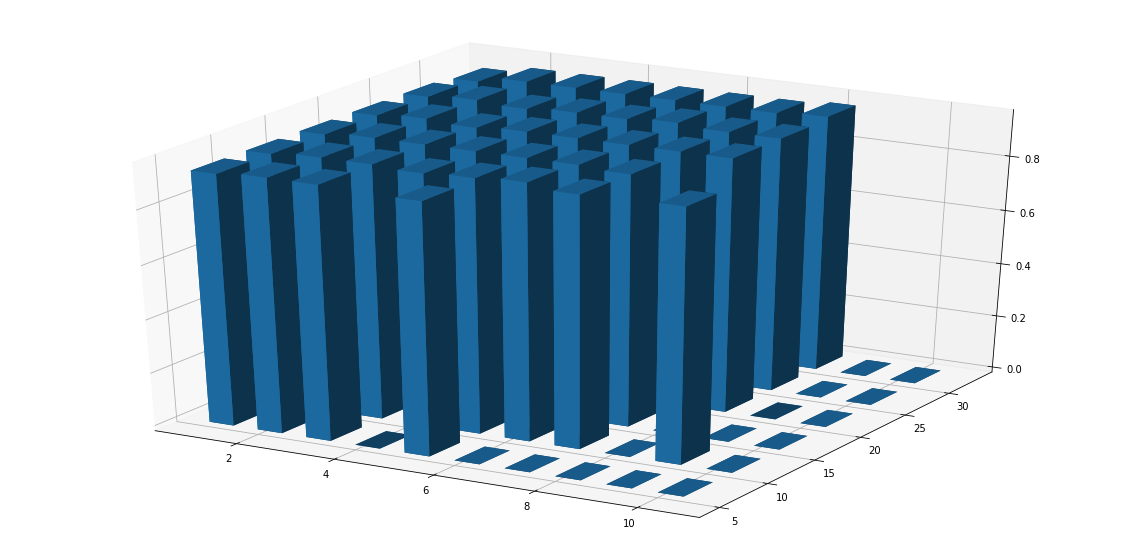

In [21]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')
    
x,y,dz = zip(*[(layers,hidden,res['F1']) for (layers, hidden), res in results.items()])
z = np.zeros(len(x))
dx = .5
dy = 3   
ax1.bar3d(x, y, z, dx, dy, dz)
plt.show()

In [41]:
data = [[layers, hidden, res['F1'], res['prec'], res['rec'], res['epoch']] for (layers, hidden), res in results.items()]
tabular_results = pd.DataFrame(data=data, columns=['Layers', 'Hidden', 'F1', 'Precission', 'Recall', 'Best Epoch'])

In [42]:
tabular_results

,Layers,Hidden,F1,Precission,Recall,Best Epoch
0,1,5,0.927835,0.918367,0.937500,4
1,1,10,0.927835,0.918367,0.937500,3
2,1,15,0.927835,0.918367,0.937500,3
3,1,20,0.927835,0.918367,0.937500,4
4,1,25,0.927835,0.918367,0.937500,6
5,1,30,0.916667,0.916667,0.916667,2
6,2,5,0.938776,0.920000,0.958333,4
7,2,10,0.938776,0.920000,0.958333,3
8,2,15,0.938776,0.920000,0.958333,6
9,2,20,0.938776,0.920000,0.958333,5


**d) How does the performance related to training and test data improve when the number of nodes and layers increase?**

In short... Not so much. Smallest possible setting's (1 layer, 5 nodes) F1's: 0.927835 is only 2pp lower than the best F1: 0.948454 (multiple settings, 6-8 layers, 10-30 nodes) and takes significantly less time and epochs to train (possibly less overfitted too).

Moreover, many of the models with more layers diverge and don't train at all - is is much harder to pick the right hyperparameters for complexe models like these

**e) With 4 hidden layers 10 neurons each, implement a dropout at each layer (try different dropout rates from 0%to40%and evaluate theirperformances). What is the best dropout rate?**

In [43]:
dropout_test = {}
for dropout in [.0, .1, .2, .3, .4]:
    net = FFNetwork(hidden_size=10, layers=4, dropout_probability=dropout)
    dropout_test[dropout] = net.fit(train_dataset, test_dataset, learning_rate=.1, epochs=20, batch_size=16)

/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Prec

Epoch 0, training iteration 0, loss: 0.6999213113223193
Epoch 0, training iteration 10, loss: 0.6867267615990279
Epoch 0, training iteration 20, loss: 0.5911660337061997
Epoch 0, training iteration 30, loss: 0.7577449241128493
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.6316127102692844
Epoch 1, training iteration 10, loss: 0.7584800982496049
Epoch 1, training iteration 20, loss: 0.5938030925973938
Epoch 1, training iteration 30, loss: 0.8080594805395231
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.6253757435942343
Epoch 2, training iteration 10, loss: 0.6241643813878553
Epoch 2, training iteration 20, loss: 0.6

F1 score: 0.9032258064516129
Accuracy: 0.9357142857142857
Precision: 0.9333333333333333
Recall: 0.875

TRAINING FINISHED
Best F1: 0.9400000000000001
Best F1's Precision: 0.9038461538461539
Best F1's Recall: 0.9791666666666666
Reached in epoch: 8
Epoch 0, training iteration 0, loss: 0.6882955394044943
Epoch 0, training iteration 10, loss: 0.6949075126790227
Epoch 0, training iteration 20, loss: 0.6495616086264829
Epoch 0, training iteration 30, loss: 0.6599851374667896
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.6846168260163955
Epoch 1, training iteration 10, loss: 0.7328513302871086
Epoch 1, training iteration 20, loss: 0.6388576952301661
Epoch 1, training iteration 30, loss: 0.7463792267080799
__________________________________________________
EPOCH DONE, TESTING...
______________________________

F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 18, training iteration 0, loss: 0.0807265768345945
Epoch 18, training iteration 10, loss: 0.038247254272248246
Epoch 18, training iteration 20, loss: 0.039572826977288436
Epoch 18, training iteration 30, loss: 0.03340880858568942
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.888888888888889
Accuracy: 0.9285714285714286
Precision: 0.9523809523809523
Recall: 0.8333333333333334

Epoch 19, training iteration 0, loss: 0.20235483555933143
Epoch 19, training iteration 10, loss: 0.03779073417668346
Epoch 19, training iteration 20, loss: 0.03824950606420981
Epoch 19, training iteration 30, loss: 0.04463063327633504
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92


Epoch 16, training iteration 10, loss: 0.01261291012477988
Epoch 16, training iteration 20, loss: 0.014587493287478907
Epoch 16, training iteration 30, loss: 0.20294206042343974
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 17, training iteration 0, loss: 0.08319016240031588
Epoch 17, training iteration 10, loss: 0.09107545009286065
Epoch 17, training iteration 20, loss: 0.024121663220217204
Epoch 17, training iteration 30, loss: 0.20060118105475744
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9387755102040817
Accuracy: 0.9571428571428572
Precision: 0.92
Recall: 0.9583333333333334

Epoch 18, training iteration 0, loss: 0.07457360442570544
Epoch 18, training iteration 10, loss: 0.025946189078334736
Epoch 18, training iterati

F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 15, training iteration 0, loss: 0.19384380559813214
Epoch 15, training iteration 10, loss: 0.1509137570751102
Epoch 15, training iteration 20, loss: 0.19279321240428735
Epoch 15, training iteration 30, loss: 0.08204696463896284
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 16, training iteration 0, loss: 0.21499325580116702
Epoch 16, training iteration 10, loss: 0.10839620793353455
Epoch 16, training iteration 20, loss: 0.0637730948300376
Epoch 16, training iteration 30, loss: 0.06005880992113834
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 17, tr

F1 score: 0.9400000000000001
Accuracy: 0.9571428571428572
Precision: 0.9038461538461539
Recall: 0.9791666666666666

Epoch 15, training iteration 0, loss: 0.04304969791783715
Epoch 15, training iteration 10, loss: 0.17788935391172994
Epoch 15, training iteration 20, loss: 0.4081677296965812
Epoch 15, training iteration 30, loss: 0.07377914121860023
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.9375

Epoch 16, training iteration 0, loss: 0.07373492309835529
Epoch 16, training iteration 10, loss: 0.02114420037165081
Epoch 16, training iteration 20, loss: 0.023707071323257237
Epoch 16, training iteration 30, loss: 0.19560629434995983
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.923076923076923
Accuracy: 0.9428571428571428
Precision: 0.8571

In [44]:
dropout_test

{0.0: {'F1': 0.9400000000000001,
  'prec': 0.9038461538461539,
  'rec': 0.9791666666666666,
  'epoch': 8},
 0.1: {'F1': 0.9387755102040817,
  'prec': 0.92,
  'rec': 0.9583333333333334,
  'epoch': 14},
 0.2: {'F1': 0.9411764705882353,
  'prec': 0.8888888888888888,
  'rec': 1.0,
  'epoch': 13},
 0.3: {'F1': 0.9387755102040817,
  'prec': 0.92,
  'rec': 0.9583333333333334,
  'epoch': 19},
 0.4: {'F1': 0.9400000000000001,
  'prec': 0.9038461538461539,
  'rec': 0.9791666666666666,
  'epoch': 14}}

Best dropout rate seems to be 0.2. Dropout increases training time (more epochs needed)

**f)With 2 hidden layers 10 neurons each, use at least 3 different activation functions in the hidden layersand compare the results.What is the best activation function?**

In [48]:
activation_test = {}
for activation in ['relu', 'tanh', 'sigm']:
    print('ACTIVATION:', activation)
    net = FFNetwork(hidden_size=10, layers=2, activation=activation)
    activation_test[activation] = net.fit(train_dataset, test_dataset, learning_rate=.1, epochs=15, batch_size=16)

ACTIVATION: relu
Epoch 0, training iteration 0, loss: 0.694301953397453
Epoch 0, training iteration 10, loss: 0.6894571311584388
Epoch 0, training iteration 20, loss: 0.6555928189066977
Epoch 0, training iteration 30, loss: 0.5854396433420976
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 1, training iteration 0, loss: 0.6599347702817246
Epoch 1, training iteration 10, loss: 0.6041804000654429
Epoch 1, training iteration 20, loss: 0.7340063474918482
Epoch 1, training iteration 30, loss: 0.5343145657677721
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 2, training iteration 0, loss: 0.5271892172452344
Epoch 2, training iteration 10, loss: 0.6750662101114765
Epoch 2, training iterati

/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/home/kariok/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Prec

Epoch 2, training iteration 30, loss: 0.6305547588345092
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 3, training iteration 0, loss: 0.5337013524441152
Epoch 3, training iteration 10, loss: 0.5680579956498263
Epoch 3, training iteration 20, loss: 0.5912276163393528
Epoch 3, training iteration 30, loss: 0.5111155003048194
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.6756756756756757
Accuracy: 0.8285714285714286
Precision: 0.9615384615384616
Recall: 0.5208333333333334

Epoch 4, training iteration 0, loss: 0.619311731053733
Epoch 4, training iteration 10, loss: 0.39959262112968597
Epoch 4, training iteration 20, loss: 0.3838551740004949
Epoch 4, training iteration 30, loss: 0.2926471271518641
__________________________________________________
E

F1 score: 0.9183673469387755
Accuracy: 0.9428571428571428
Precision: 0.9
Recall: 0.9375

Epoch 6, training iteration 0, loss: 0.036845041844390754
Epoch 6, training iteration 10, loss: 0.06769815789579993
Epoch 6, training iteration 20, loss: 0.02726195486645254
Epoch 6, training iteration 30, loss: 0.054322738636545756
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9199999999999999
Accuracy: 0.9428571428571428
Precision: 0.8846153846153846
Recall: 0.9583333333333334

Epoch 7, training iteration 0, loss: 0.05227791624186
Epoch 7, training iteration 10, loss: 0.2266703045524301
Epoch 7, training iteration 20, loss: 0.03527288478872585
Epoch 7, training iteration 30, loss: 0.2587752831449613
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.9278350515463918
Accuracy: 0.95
Precision: 0.9183673469387755
Recall: 0.93

Epoch 9, training iteration 30, loss: 0.6940464563049142
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 10, training iteration 0, loss: 0.6873081521290295
Epoch 10, training iteration 10, loss: 0.6984413489785178
Epoch 10, training iteration 20, loss: 0.7088697474160062
Epoch 10, training iteration 30, loss: 0.6115732710769586
__________________________________________________
EPOCH DONE, TESTING...
__________________________________________________
F1 score: 0.0
Accuracy: 0.6571428571428571
Precision: 0.0
Recall: 0.0

Epoch 11, training iteration 0, loss: 0.6151625306488424
Epoch 11, training iteration 10, loss: 0.6111306554178246
Epoch 11, training iteration 20, loss: 0.6898990731048501
Epoch 11, training iteration 30, loss: 0.6119055059304256
__________________________________________________
EPOCH DONE, TESTING...
_______________

In [49]:
activation_test

{'relu': {'F1': 0.9387755102040817,
  'prec': 0.92,
  'rec': 0.9583333333333334,
  'epoch': 10},
 'tanh': {'F1': 0.9387755102040817,
  'prec': 0.92,
  'rec': 0.9583333333333334,
  'epoch': 14},
 'sigm': {'F1': 0, 'prec': 0, 'rec': 0, 'epoch': 0}}

Results for ReLU and tanh activations are the same, which makes ReLU the prefered activation, since it's the simples to compute and differentiate. 

For sigmoid, the model does not converge, probably because of the small sensitive-to-changes area in the function's domain (most of it is almost flat)